In [70]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from preprocessing import PreProcessing
# from cmap import Colormap
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans, KMeans, SpectralClustering
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC

## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [2]:
game_1_pre = PreProcessing(data_home="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv", 
                           data_away="data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv")
game_1_data = game_1_pre.load_and_process_data(add_ball_data=False, half_period="both")

In [3]:
game_2_pre = PreProcessing(data_home="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Home_Team.csv", 
                           data_away="data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv")
game_2_data = game_2_pre.load_and_process_data(add_ball_data=False, half_period="both")

In [4]:
game_1_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,Away-Player20-x,Away-Player20-y,Away-Player21-x,Away-Player21-y,Away-Player22-x,Away-Player22-y,Away-Player23-x,Away-Player23-y,Away-Player24-x,Away-Player24-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55974,0.67776,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55992,0.67791,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,145002,5800.08,0.90614,0.45355,0.30044,0.68311,0.34157,0.64598,0.31228,...,0.14913,0.56230,0.10317,0.81976,0.19836,0.45137,0.29416,0.48874,0.35600,0.55371
145003,2,145003,5800.12,0.90550,0.45355,0.30044,0.68311,0.34127,0.64583,0.31230,...,0.14937,0.56218,0.10319,0.81960,0.19831,0.45182,0.29373,0.48836,0.35583,0.55283
145004,2,145004,5800.16,0.90492,0.45355,0.30044,0.68311,0.34089,0.64569,0.31214,...,0.14926,0.56204,0.10285,0.81944,0.19805,0.45200,0.29331,0.48800,0.35561,0.55254
145005,2,145005,5800.20,0.90456,0.45356,0.30044,0.68311,0.34056,0.64552,0.31171,...,0.14857,0.56068,0.10231,0.81944,0.19766,0.45237,0.29272,0.48789,0.35532,0.55243


In [5]:
game_2_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,Away-Player20-x,Away-Player20-y,Away-Player21-x,Away-Player21-y,Away-Player22-x,Away-Player22-y,Away-Player23-x,Away-Player23-y,Away-Player24-x,Away-Player24-y
1,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
2,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
3,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
4,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
5,1,5,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46751,1.05000,0.44966,0.41572,0.26855,0.61845,0.36760,0.12496
141153,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46790,1.05000,0.44983,0.41550,0.26855,0.61845,0.36760,0.12496
141154,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46818,1.05000,0.44997,0.41485,0.26855,0.61845,0.36760,0.12496
141155,2,141155,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.25594,0.38425,0.46855,1.05000,0.45017,0.41515,0.26855,0.61845,0.36760,0.12496


## Tracking for individual Players for the First Period

In [6]:
game_2_pre.player_tracking(game_2_data.iloc[2:3], players=[1,2,3,4,5,6,7,8,9,10,11], sides=["Home"]*11, plot_ball=False)

AttributeError: 'PreProcessing' object has no attribute 'player_tracking'

In [ ]:
# player_tracking(period_1_data)
# player_tracking(period_1_data_home, [2])
# player_tracking(period_1_data_home, [5])
# player_tracking(period_1_data_home, [8])

# Grouping players time interval on 1 second interval

In [11]:
game_1_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,Away-Player20-x,Away-Player20-y,Away-Player21-x,Away-Player21-y,Away-Player22-x,Away-Player22-y,Away-Player23-x,Away-Player23-y,Away-Player24-x,Away-Player24-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55960,0.67775,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55974,0.67776,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55992,0.67791,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,145002,5800.08,0.90614,0.45355,0.30044,0.68311,0.34157,0.64598,0.31228,...,0.14913,0.56230,0.10317,0.81976,0.19836,0.45137,0.29416,0.48874,0.35600,0.55371
145003,2,145003,5800.12,0.90550,0.45355,0.30044,0.68311,0.34127,0.64583,0.31230,...,0.14937,0.56218,0.10319,0.81960,0.19831,0.45182,0.29373,0.48836,0.35583,0.55283
145004,2,145004,5800.16,0.90492,0.45355,0.30044,0.68311,0.34089,0.64569,0.31214,...,0.14926,0.56204,0.10285,0.81944,0.19805,0.45200,0.29331,0.48800,0.35561,0.55254
145005,2,145005,5800.20,0.90456,0.45356,0.30044,0.68311,0.34056,0.64552,0.31171,...,0.14857,0.56068,0.10231,0.81944,0.19766,0.45237,0.29272,0.48789,0.35532,0.55243


In [12]:
def vel_acc(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the velocity and acceleration of players and ball in a given dataset.
    
    Parameters:
    dataset (pandas.DataFrame): The input dataset containing player and ball positions over time.
    
    Returns:
    pandas.DataFrame: The original dataset with additional columns for velocity and acceleration.
    """
    temp_data = copy.deepcopy(dataset)
    star_idx = temp_data.columns.get_loc("Time [s]")
    player_columns = temp_data.columns[star_idx + 1:]

    for i in range(0, player_columns.shape[0] - 1, 2):
        # Calculate Euclidean distance between consecutive points
        ply_x, ply_y = player_columns[i], player_columns[i + 1]

        x_diff = temp_data[ply_x].diff()
        y_diff = temp_data[ply_y].diff()
        
        # Calculate time difference between frames
        time_diff = temp_data["Time [s]"].diff()
        
        # Calculate velocity (distance travelled / time)
        vx = x_diff / time_diff
        vy = y_diff / time_diff
        velocity = np.sqrt(vx**2 + vy**2)
        
        # Calculate acceleration (change in velocity / time)
        ax = vx.diff() / time_diff
        ay = vy.diff() / time_diff
        acceleration = np.sqrt(ax**2 + ay**2)
        
        if "Ball" in ply_x:
            temp_data[f"ball_velocity"] = velocity
            temp_data[f"ball_acceleration"] = acceleration
        else:
            players_num = ply_x[11]
            if len(ply_x) == 15:
                players_num = ply_x[11:13]
                
            temp_data[f"P_{players_num}_velocity"] = velocity
            temp_data[f"P_{players_num}_acceleration"] = acceleration
    
    return temp_data

In [13]:
def get_frames(dataset: pd.DataFrame, players: list[int], frame: int, frame_interval: int = 5000) -> pd.DataFrame:
    start_range = dataset.index[0] if frame - frame_interval < dataset.index[0] else frame - frame_interval
    end_range = (dataset.index[-1] if frame + frame_interval > dataset.index[-1] else frame + frame_interval) + 1
    
    index = pd.RangeIndex(start=start_range, stop=end_range, step=1)
    temp_data = pd.DataFrame(index=index)
    # temp_data["Time[s]"] = dataset["Time[s]"]

    for i in players:
        players_num = i[11]
        if len(i) == 15:
            players_num = i[11:13]
        players_num = int(players_num)
        
        if int(players_num) < 15:
            # The index is the same as frames
            temp_data[f"Home-Player{players_num}-x"] = dataset.loc[start_range:end_range, f"Home-Player{players_num}-x"]
            temp_data[f"Home-Player{players_num}-y"] = dataset.loc[start_range:end_range, f"Home-Player{players_num}-y"]
        else:
            # The index is the same as frames
            temp_data[f"Away-Player{players_num}-x"] = dataset.loc[start_range:end_range, f"Away-Player{players_num}-x"]
            temp_data[f"Away-Player{players_num}-y"] = dataset.loc[start_range:end_range, f"Away-Player{players_num}-y"]

        temp_data[f"P_{players_num}_velocity"] = dataset.loc[start_range:end_range, f"P_{players_num}_velocity"]
        temp_data[f"P_{players_num}_acceleration"] = dataset.loc[start_range:end_range, f"P_{players_num}_acceleration"]
        
    return temp_data

# Tracking players closest to the ball using frames

In [14]:
vel_acc_game_1_data = vel_acc(game_1_data)
vel_acc_game_2_data = vel_acc(game_2_data)

In [15]:
vel_acc_game_1_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.003509,0.087723,0.011138,0.278458,0.019121,0.478033,0.015201,0.380019,0.029611,0.740275
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.005858,0.091001,0.008515,0.333366,0.011560,0.190804,0.022103,0.613456,0.029100,0.160078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,145002,5800.08,0.90614,0.45355,0.30044,0.68311,0.34157,0.64598,0.31228,...,0.008976,0.166419,0.010198,0.168170,0.002704,0.057622,0.013613,0.050389,0.017509,0.084085
145003,2,145003,5800.12,0.90550,0.45355,0.30044,0.68311,0.34127,0.64583,0.31230,...,0.006708,0.073154,0.004031,0.162500,0.011319,0.245029,0.014346,0.025000,0.022407,0.122793
145004,2,145004,5800.16,0.90492,0.45355,0.30044,0.68311,0.34089,0.64569,0.31214,...,0.004451,0.219107,0.009394,0.225000,0.007906,0.213783,0.013829,0.013975,0.009100,0.370072
145005,2,145005,5800.20,0.90456,0.45356,0.30044,0.68311,0.34056,0.64552,0.31171,...,0.038126,0.844282,0.013500,0.160078,0.013440,0.143886,0.015004,0.188953,0.007754,0.120708


In [16]:
vel_acc_game_2_data

,Period,Frame,Time [s],Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,NaN,0.00000,NaN,0.000000,NaN,0.0,NaN,0.0,NaN
3,1,3,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,1,4,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,1,5,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,141152,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00875,0.06250,0.010000,0.038017,0.0,0.0,0.0,0.0
141153,2,141153,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00975,0.02500,0.006951,0.076291,0.0,0.0,0.0,0.0
141154,2,141154,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00700,0.06875,0.016623,0.269403,0.0,0.0,0.0,0.0
141155,2,141155,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,...,0.0,0.0,0.00925,0.05625,0.009014,0.594933,0.0,0.0,0.0,0.0


In [17]:
game_1_ply_tra = vel_acc_game_1_data.iloc[:, 3:]
game_2_ply_tra = vel_acc_game_2_data.iloc[:, 3:]

In [18]:
game_2_ply_tra

,Home-Player11-x,Home-Player11-y,Home-Player1-x,Home-Player1-y,Home-Player2-x,Home-Player2-y,Home-Player3-x,Home-Player3-y,Home-Player4-x,Home-Player4-y,...,P_20_velocity,P_20_acceleration,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration
1,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,NaN,0.00000,NaN,0.000000,NaN,0.0,NaN,0.0,NaN
3,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,...,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00875,0.06250,0.010000,0.038017,0.0,0.0,0.0,0.0
141153,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00975,0.02500,0.006951,0.076291,0.0,0.0,0.0,0.0
141154,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00700,0.06875,0.016623,0.269403,0.0,0.0,0.0,0.0
141155,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,0.40837,0.14449,...,0.0,0.0,0.00925,0.05625,0.009014,0.594933,0.0,0.0,0.0,0.0


In [19]:
# game_1_players, game_1_vel_acc = game_1_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_1_ply_tra.loc[:,"P_1_velocity":]
# game_2_players, game_2_vel_acc = game_2_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_2_ply_tra.loc[:,"P_1_velocity":]

In [20]:
game_1_player_data = get_frames(game_1_ply_tra, players=game_1_ply_tra.columns[0:44:2], frame=1000000, frame_interval=1000000).fillna(0)
game_2_player_data = get_frames(game_2_ply_tra, players=game_2_ply_tra.columns[0:44:2], frame=1000000, frame_interval=1000000).fillna(0)

In [21]:
game_2_player_data

,Home-Player11-x,Home-Player11-y,P_11_velocity,P_11_acceleration,Home-Player1-x,Home-Player1-y,P_1_velocity,P_1_acceleration,Home-Player2-x,Home-Player2-y,...,P_22_velocity,P_22_acceleration,Away-Player23-x,Away-Player23-y,P_23_velocity,P_23_acceleration,Away-Player24-x,Away-Player24-y,P_24_velocity,P_24_acceleration
1,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
2,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
3,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
4,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
5,0.94275,0.50413,0.0,0.0,0.64812,0.28605,0.0,0.0,0.67752,0.42803,...,0.000000,0.000000,0.50177,0.50145,0.0,0.0,0.49517,0.36234,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.010000,0.038017,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0
141153,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.006951,0.076291,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0
141154,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.016623,0.269403,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0
141155,0.06285,0.51243,0.0,0.0,0.38499,0.15356,0.0,0.0,0.22558,0.41355,...,0.009014,0.594933,0.26855,0.61845,0.0,0.0,0.36760,0.12496,0.0,0.0


# Classification

In [22]:
def change_player_name(data: pd.Series) -> pd.Series:
    result = []
    name = ""
    for i in range(len(data)):
        item = data.iloc[i]
        if len(item) == 8:
            if int(item[-2:]) < 12:
                name = f"Home-P_{item[-2:]}"
            else:
                name = f"Away-P_{item[-2:]}"
        else:
            name = f"Home-P_{item[-1:]}"
            
        result.append(name)

    return pd.Series(data=result, name=data.name)

In [23]:
game_1_event_data = pd.read_csv("data/Sample_Game_1/Sample_Game_1_RawEventsData.csv")
game_2_event_data = pd.read_csv("data/Sample_Game_2/Sample_Game_2_RawEventsData.csv")

In [24]:
game_1_event_data

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN


In [25]:
game_1_event_data = game_1_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_2_event_data = game_2_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]

In [26]:
game_1_event_data.sample(5)

,Type,Start Frame,End Frame,From,To
575,BALL OUT,46001,46037,Player16,NaN
1070,BALL LOST,84924,84924,Player7,NaN
916,BALL OUT,73409,73434,Player7,NaN
1550,PASS,127385,127392,Player28,Player27
1314,RECOVERY,107917,107917,Player2,NaN


In [27]:
start_frames = np.array(game_1_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_1_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_1_event = pd.DataFrame(columns=["Type"])
end = game_1_player_data.index[-1]
for i, f in enumerate(frame_ranges):
    e = (f[1] if end > f[1] else end) + 1
    for j in range(f[0], e):
        game_1_event.loc[j, "Type"] =  game_1_event_data.loc[i + 1, "Type"]
        # game_1_event.loc[j, "From"] =  game_1_event_data.loc[i + 1, "From"]
        # game_1_event.loc[j, "To"] =  game_1_event_data.loc[i + 1, "To"]
        
game_1_event = game_1_event.fillna("")

In [28]:
start_frames = np.array(game_2_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_2_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_2_event = pd.DataFrame(columns=["Type"])
end = game_2_player_data.index[-1]
for i, f in enumerate(frame_ranges):
    e = (f[1] if end > f[1] else end) + 1
    for j in range(f[0], e):
        game_2_event.loc[j, "Type"] =  game_2_event_data.loc[i + 1, "Type"]
        # game_2_event.loc[j, "From"] =  game_2_event_data.loc[i + 1, "From"]
        # game_2_event.loc[j, "To"] =  game_2_event_data.loc[i + 1, "To"]

game_2_event = game_2_event.fillna("")

In [29]:
game_1_event

,Type
1,PASS
2,PASS
3,PASS
4,PASS
5,PASS
...,...
143626,BALL OUT
143627,BALL OUT
143628,BALL OUT
143629,BALL OUT


In [30]:
game_2_event

,Type
51,PASS
52,PASS
53,PASS
54,PASS
55,PASS
...,...
140294,BALL OUT
140295,BALL OUT
140296,BALL OUT
140297,BALL OUT


In [71]:
X_1 = game_1_player_data.loc[game_1_event.index]
y_1 = np.array(game_1_event["Type"])

In [72]:
X_2 = game_2_player_data.loc[game_2_event.index]
y_2 = np.array(game_2_event["Type"])

In [73]:
X = pd.concat([X_1, X_2])
y = np.concatenate((y_1, y_2))

assert X.shape[0] == y.shape[0]

In [74]:
sme = BorderlineSMOTE()
X_res, y_res = sme.fit_resample(X, y)

In [75]:
splits = {"X_train": [], "X_test": [], "y_train": [], "y_test": []}
scaled = {"X_train": [], "X_test": [], "y_train": [], "y_test": []}

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)
    
    splits["X_train"].append(X_train)
    splits["X_test"].append(X_test)
    splits["y_train"].append(y_train)
    splits["y_test"].append(y_test)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # sme = SMOTE(n_jobs=-2, k_neighbors=1)
    # X_train_res, y_train_res = sme.fit_resample(X_train_scaled, y_train)
    
    scaled["X_train"].append(X_train_scaled)
    scaled["X_test"].append(X_test_scaled)
    scaled["y_train"].append(y_train)
    scaled["y_test"].append(y_test)


In [76]:
[i.shape for i in splits["X_train"]]

[(291493, 88), (291493, 88), (291493, 88), (291493, 88), (291493, 88)]

In [77]:
for k,v in scaled.items():
    for i in v:
        print(k, i.shape)

X_train (291493, 88)
X_train (291493, 88)
X_train (291493, 88)
X_train (291493, 88)
X_train (291493, 88)
X_test (72874, 88)
X_test (72874, 88)
X_test (72874, 88)
X_test (72874, 88)
X_test (72874, 88)
y_train (291493,)
y_train (291493,)
y_train (291493,)
y_train (291493,)
y_train (291493,)
y_test (72874,)
y_test (72874,)
y_test (72874,)
y_test (72874,)
y_test (72874,)


In [78]:
for k,v in scaled.items():
    for i in v:
        print(k, i.shape)

X_train (291493, 88)
X_train (291493, 88)
X_train (291493, 88)
X_train (291493, 88)
X_train (291493, 88)
X_test (72874, 88)
X_test (72874, 88)
X_test (72874, 88)
X_test (72874, 88)
X_test (72874, 88)
y_train (291493,)
y_train (291493,)
y_train (291493,)
y_train (291493,)
y_train (291493,)
y_test (72874,)
y_test (72874,)
y_test (72874,)
y_test (72874,)
y_test (72874,)


In [ ]:
# vectorizer = CountVectorizer()
# vectorizer.fit(y_train.ravel())
# y_train = vectorizer.transform(y_train.ravel())
# y_test = vectorizer.transform(y_test.ravel())
# y_train = y_train.toarray()
# y_test = y_test.toarray()

In [ ]:
# y_res.shape

In [ ]:
y_test.shape

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
# np.unique(y_res, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_test, return_counts=True)

In [66]:
warnings.filterwarnings("always")

In [79]:
def conf_matrix(y_train, y_train_pred, y_test, y_pred, labels, split, model_name=""):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    cm_counts = confusion_matrix(y_test, y_pred, labels=labels)
    cm_normalized = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

    annot = []
    for i in range(len(cm_counts)):
        row_annot = []
        for j in range(len(cm_counts[i])):
            row_annot.append(f"{cm_counts[i, j]} | {cm_normalized[i, j]:.2f}")
        annot.append(row_annot)
    
    sns.heatmap(cm_normalized, 
                annot=annot,
                fmt="", 
                cmap="viridis", 
                xticklabels=labels, 
                yticklabels=labels,
                cbar_kws={"label": "Normalized Frequency"})

    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_title(f"{model_name.title()} Confusion Matrix Split #{(split+1)}")
    plt.tight_layout()
    plt.show()
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"Split #{(split+1)} {model_name} training accuracy: {train_accuracy * 100:0.2f}%")
    print(f"Split #{(split+1)} {model_name} testing accuracy: {test_accuracy * 100:0.2f}%\n")   

In [80]:
models = {
          "AdaBoost classifier": AdaBoostClassifier(random_state=42), 
          "Logistic regression": LogisticRegression(solver="saga", random_state=42),
          "Gaussian naive bayes": GaussianNB(),
          "Neural network": MLPClassifier(random_state=42), 
          "Random forest classifier": RandomForestClassifier(random_state=42), 
         }

H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


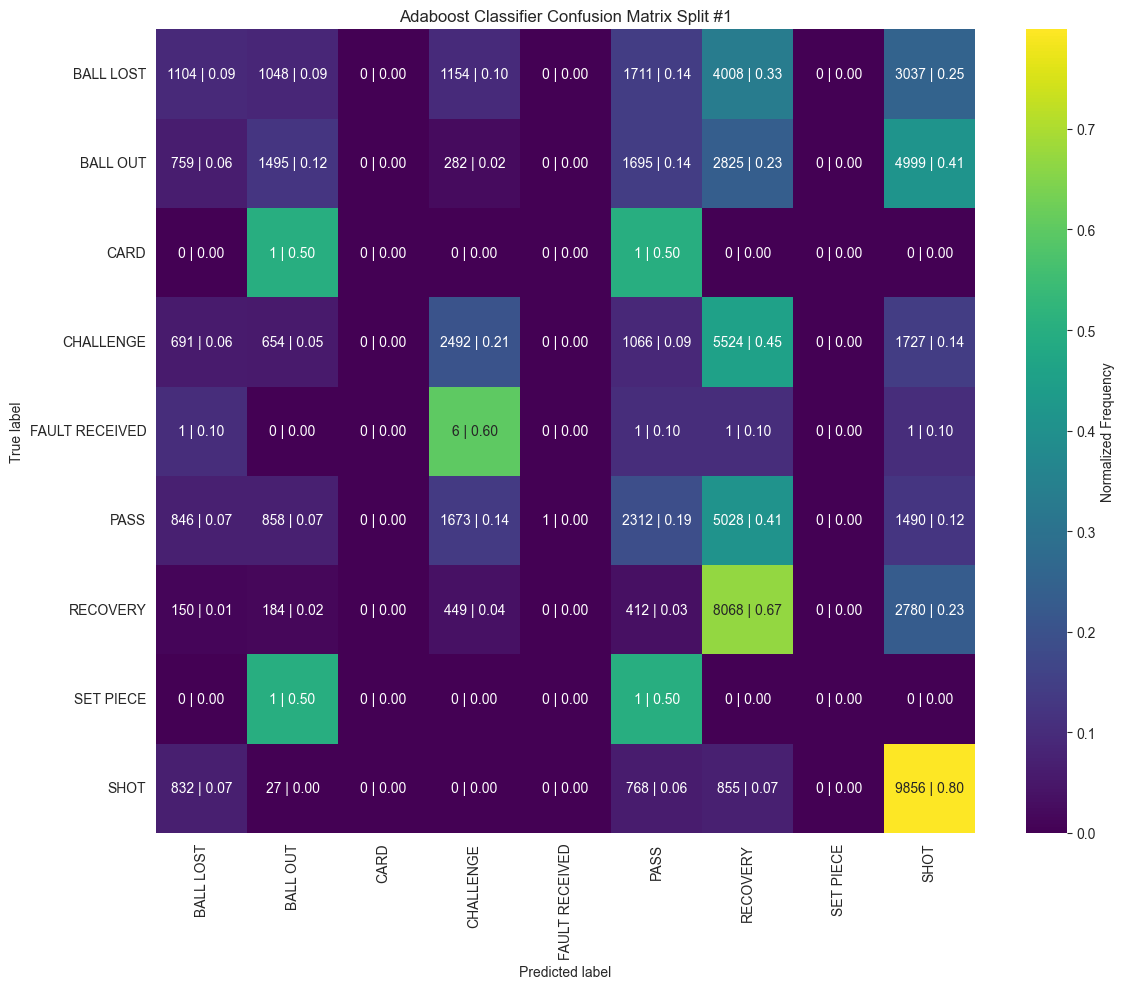

Split #1 AdaBoost classifier training accuracy: 34.38%
Split #1 AdaBoost classifier testing accuracy: 34.75%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


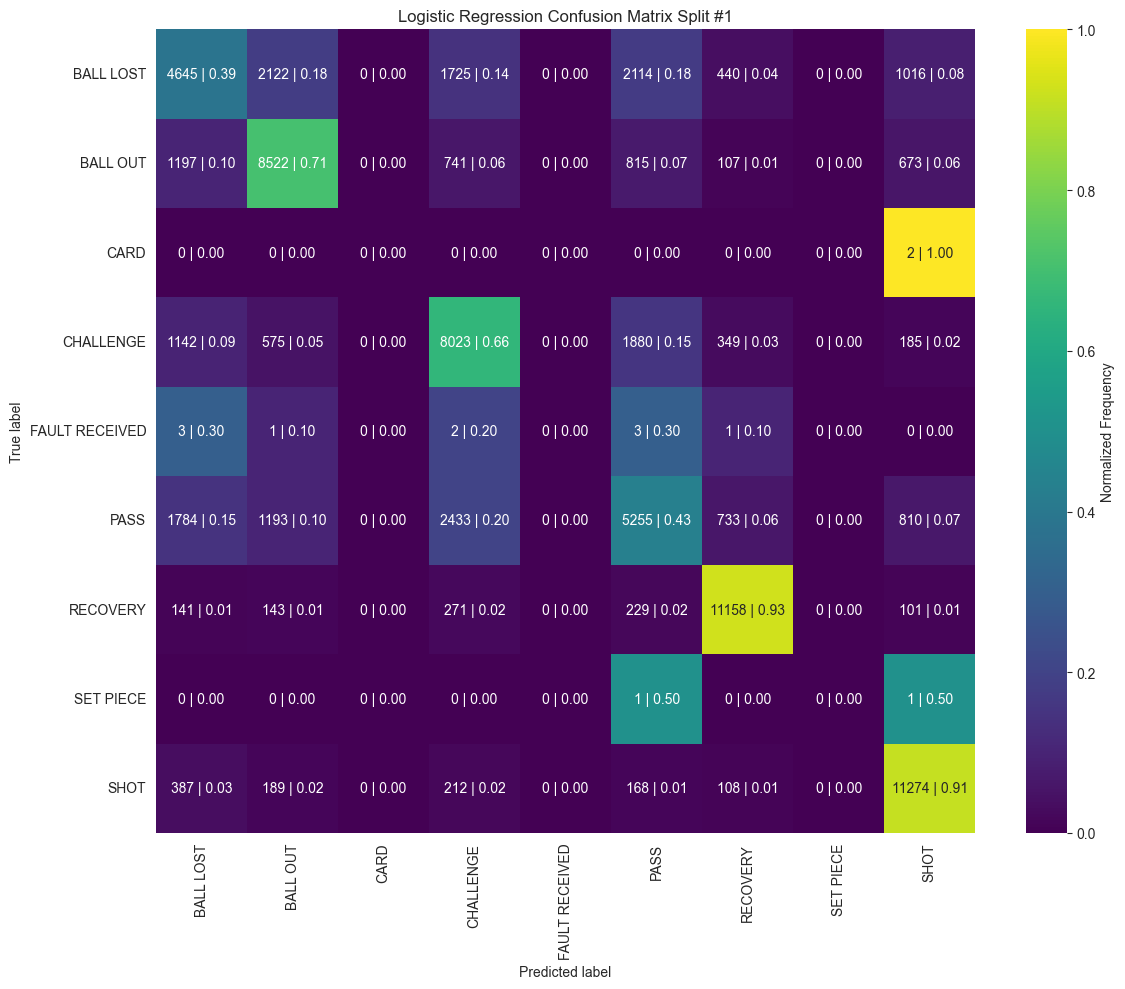

Split #1 Logistic regression training accuracy: 66.79%
Split #1 Logistic regression testing accuracy: 67.07%


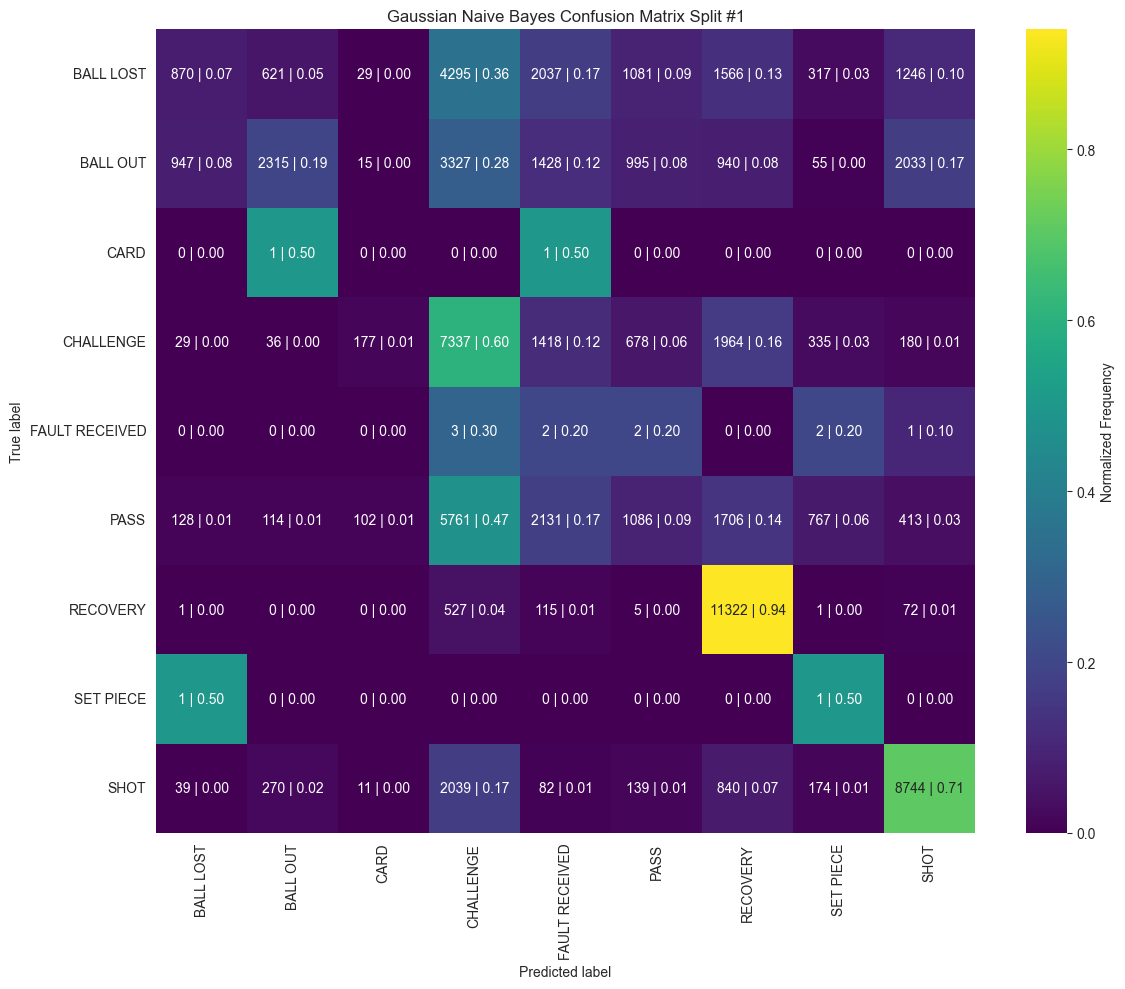

Split #1 Gaussian naive bayes training accuracy: 43.27%
Split #1 Gaussian naive bayes testing accuracy: 43.47%


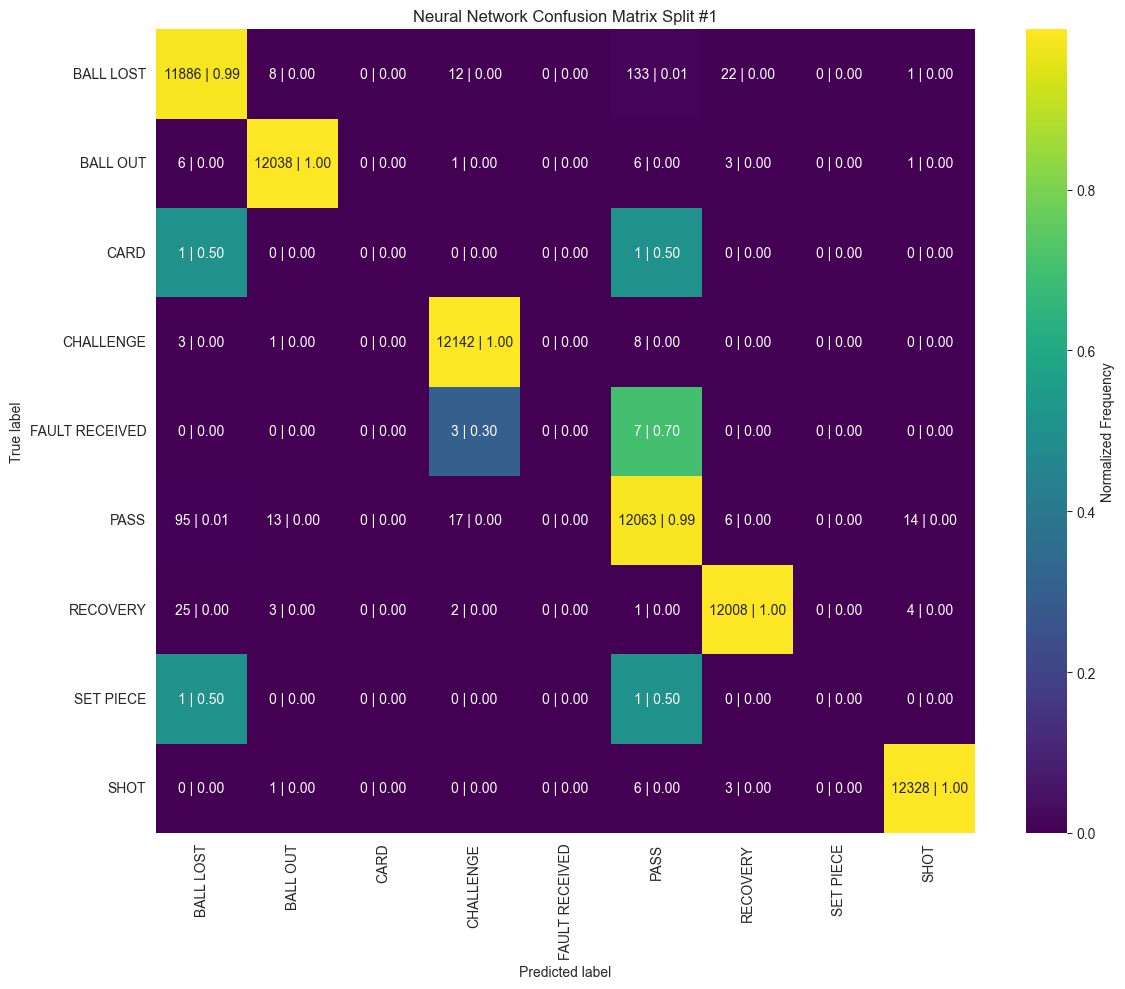

Split #1 Neural network training accuracy: 99.74%
Split #1 Neural network testing accuracy: 99.44%


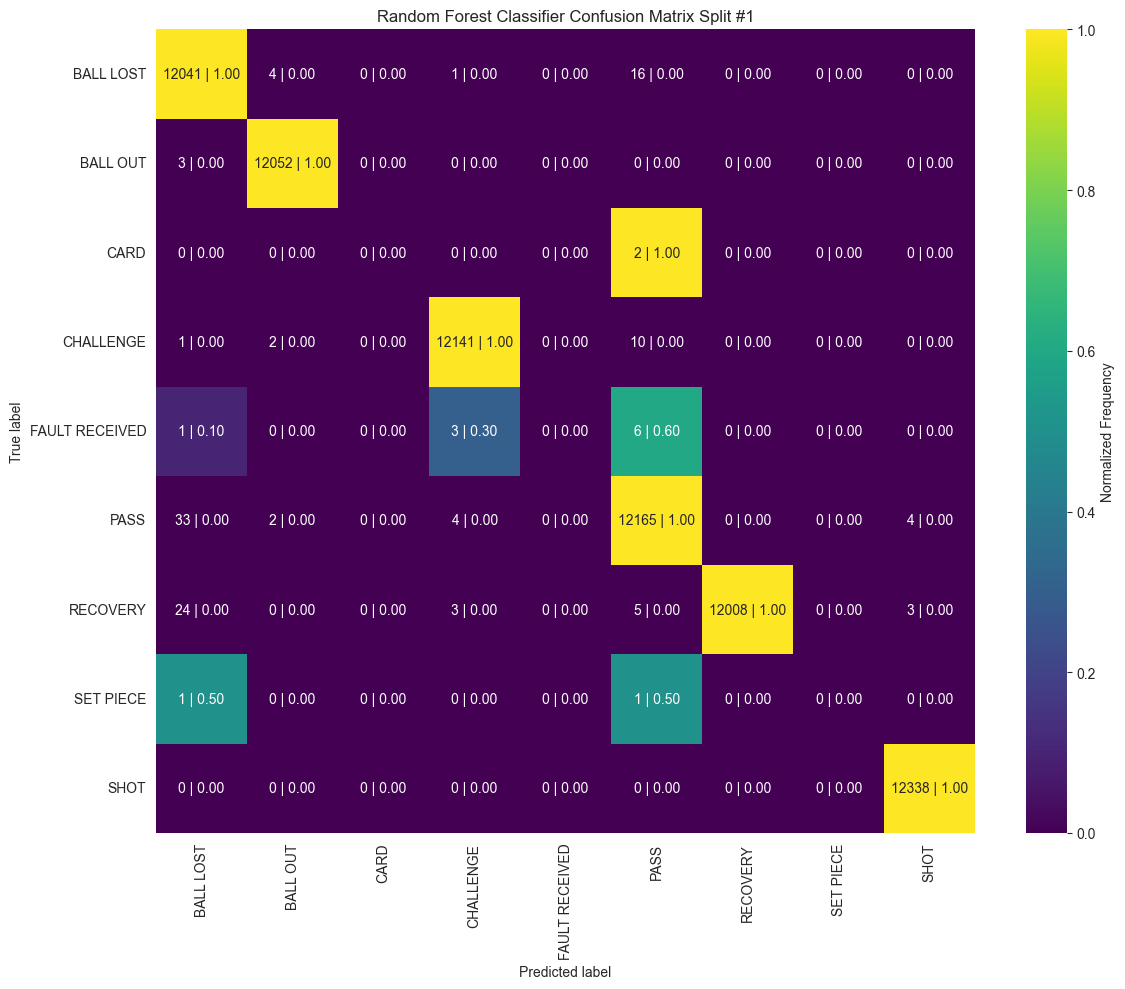

Split #1 Random forest classifier training accuracy: 100.00%
Split #1 Random forest classifier testing accuracy: 99.82%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


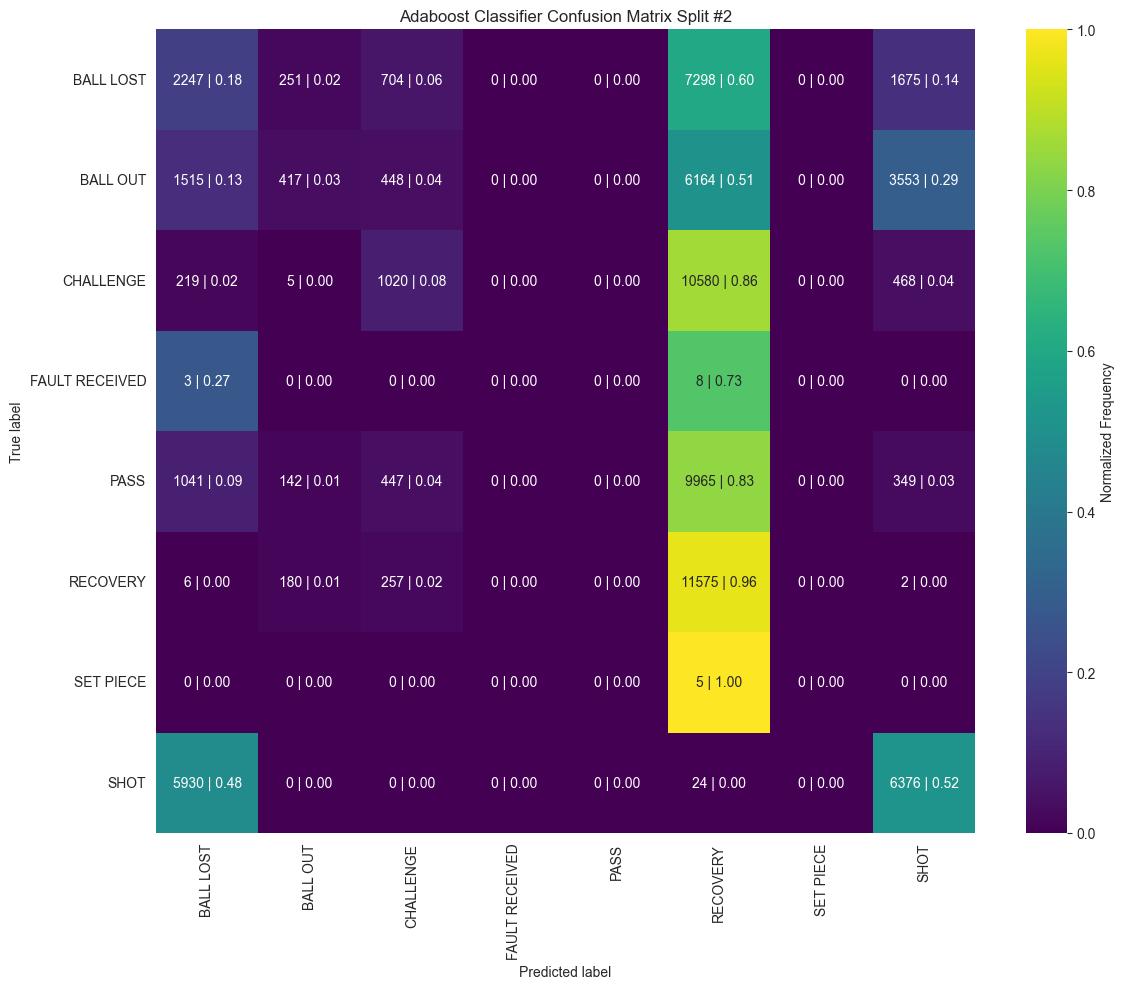

Split #2 AdaBoost classifier training accuracy: 29.69%
Split #2 AdaBoost classifier testing accuracy: 29.69%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


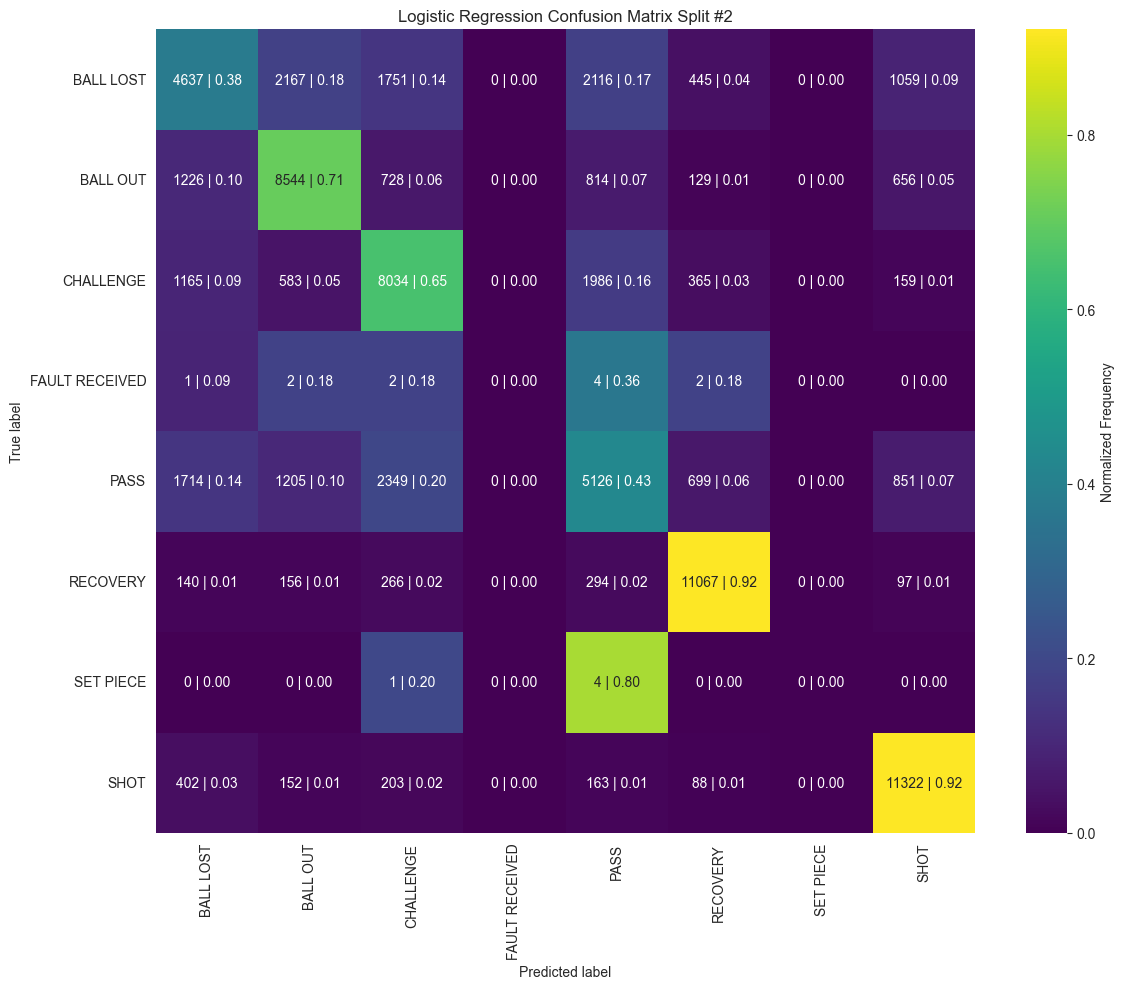

Split #2 Logistic regression training accuracy: 66.88%
Split #2 Logistic regression testing accuracy: 66.87%


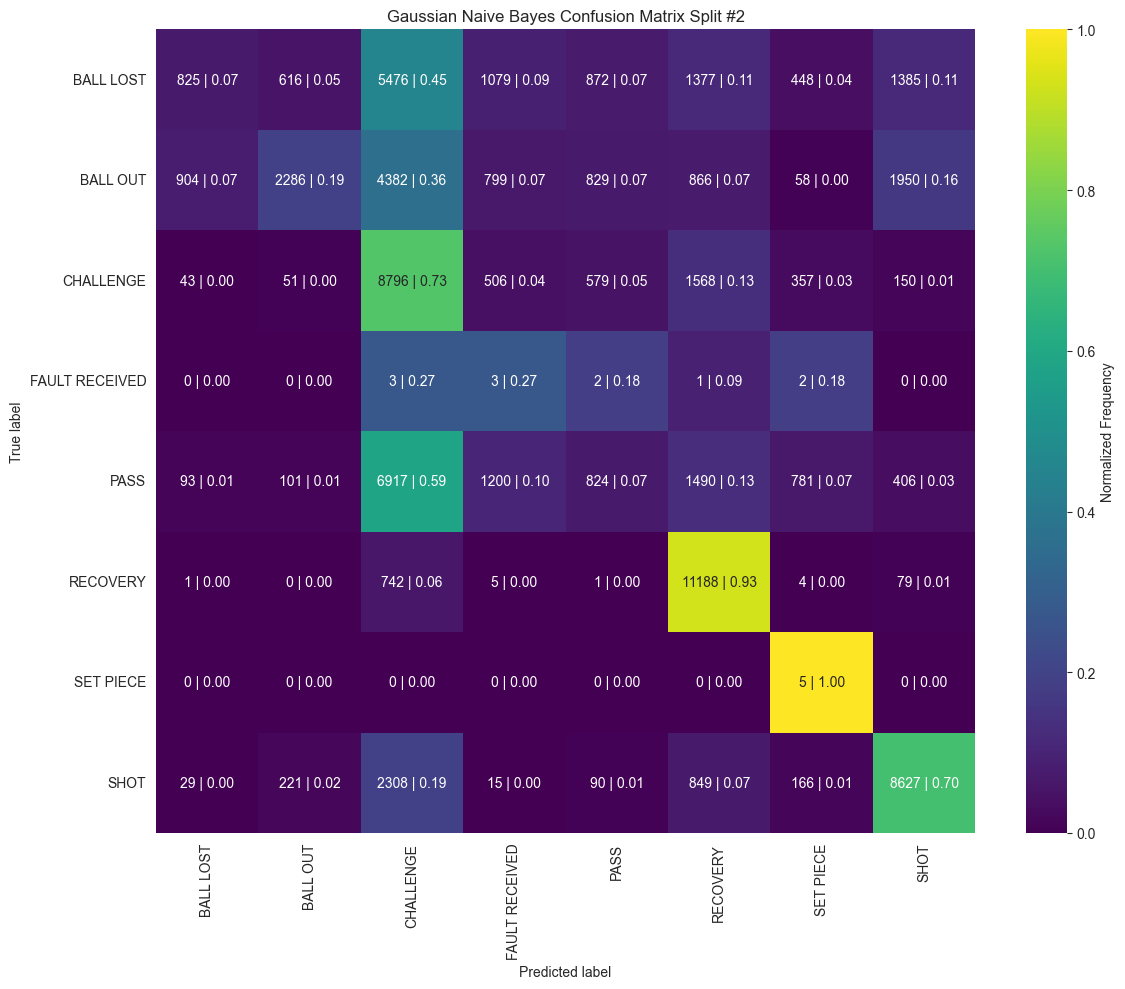

Split #2 Gaussian naive bayes training accuracy: 44.42%
Split #2 Gaussian naive bayes testing accuracy: 44.67%


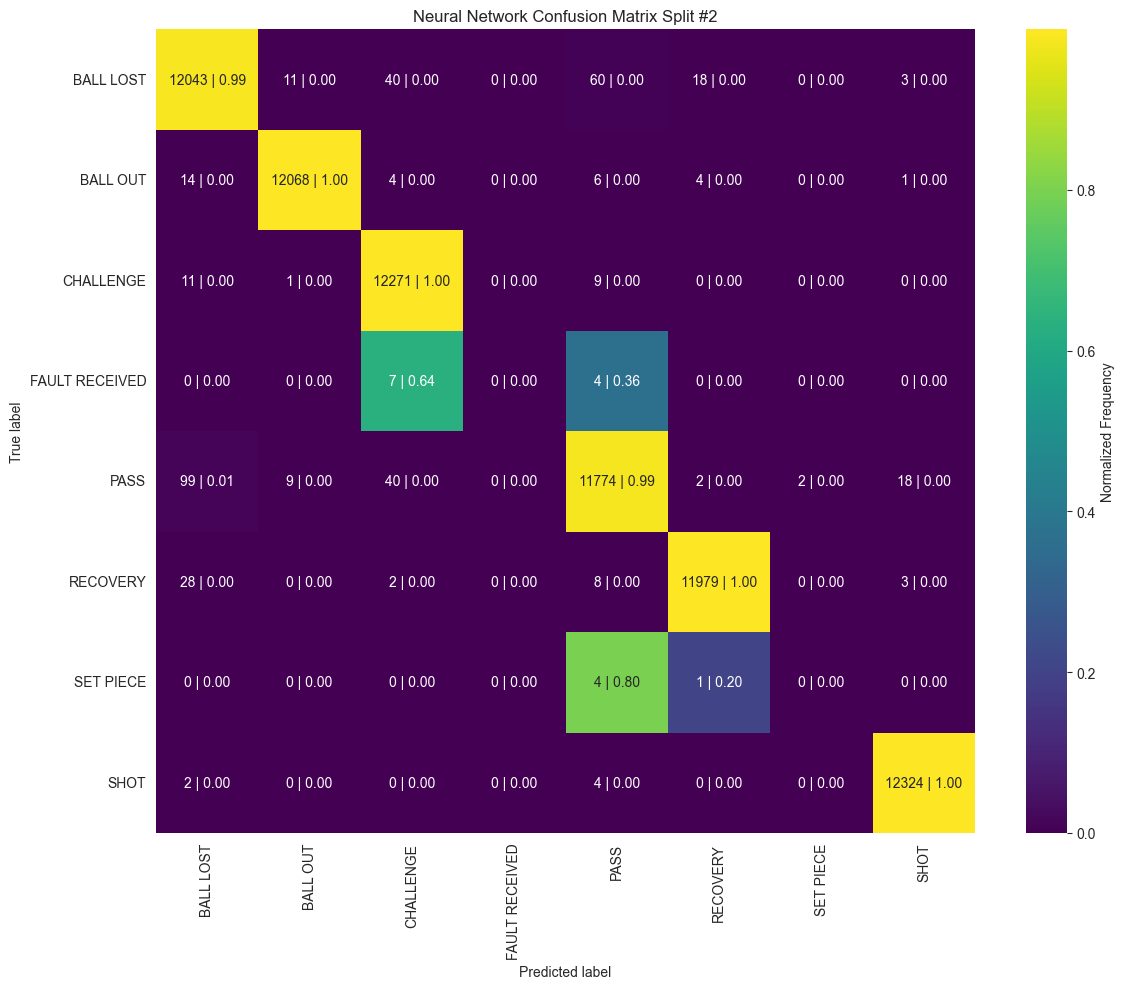

Split #2 Neural network training accuracy: 99.77%
Split #2 Neural network testing accuracy: 99.43%


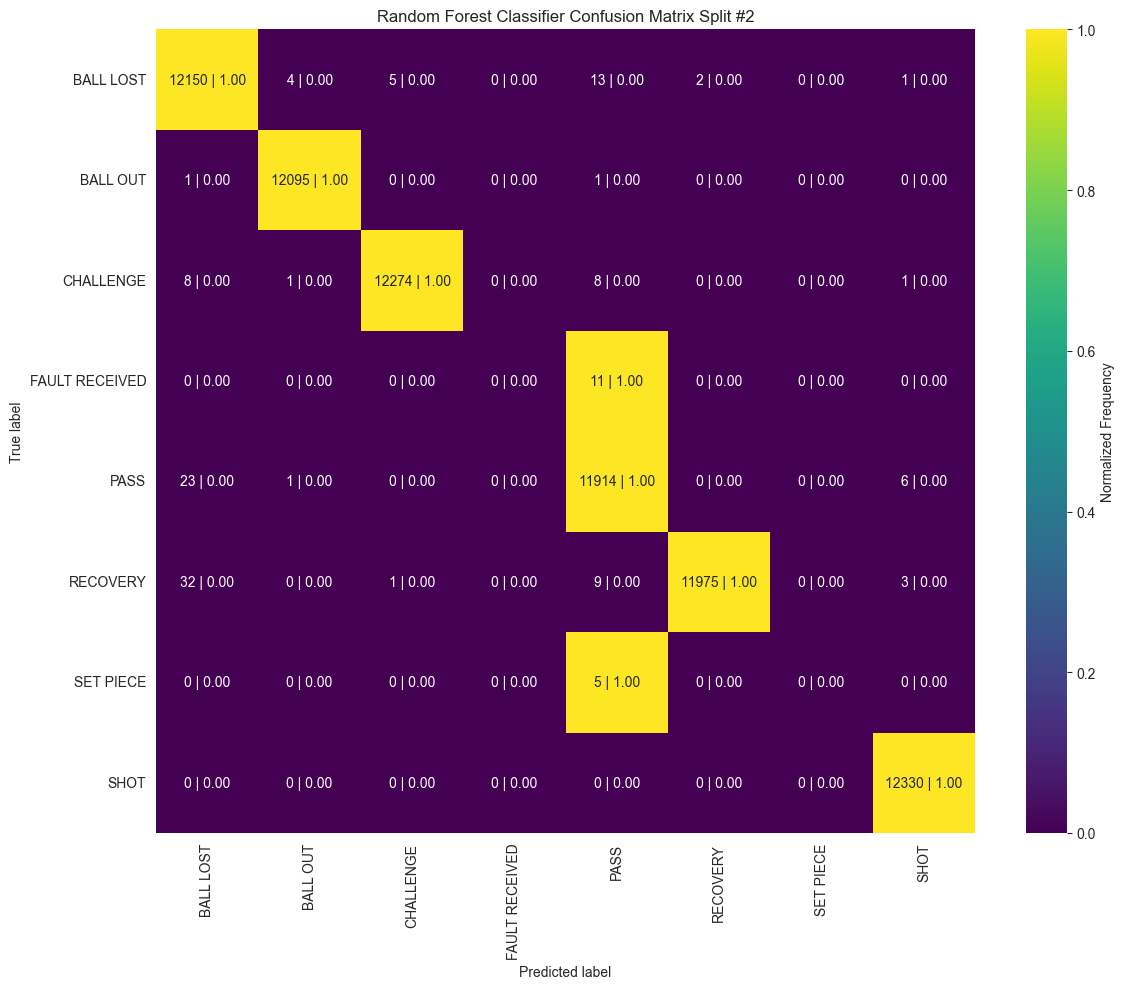

Split #2 Random forest classifier training accuracy: 100.00%
Split #2 Random forest classifier testing accuracy: 99.81%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


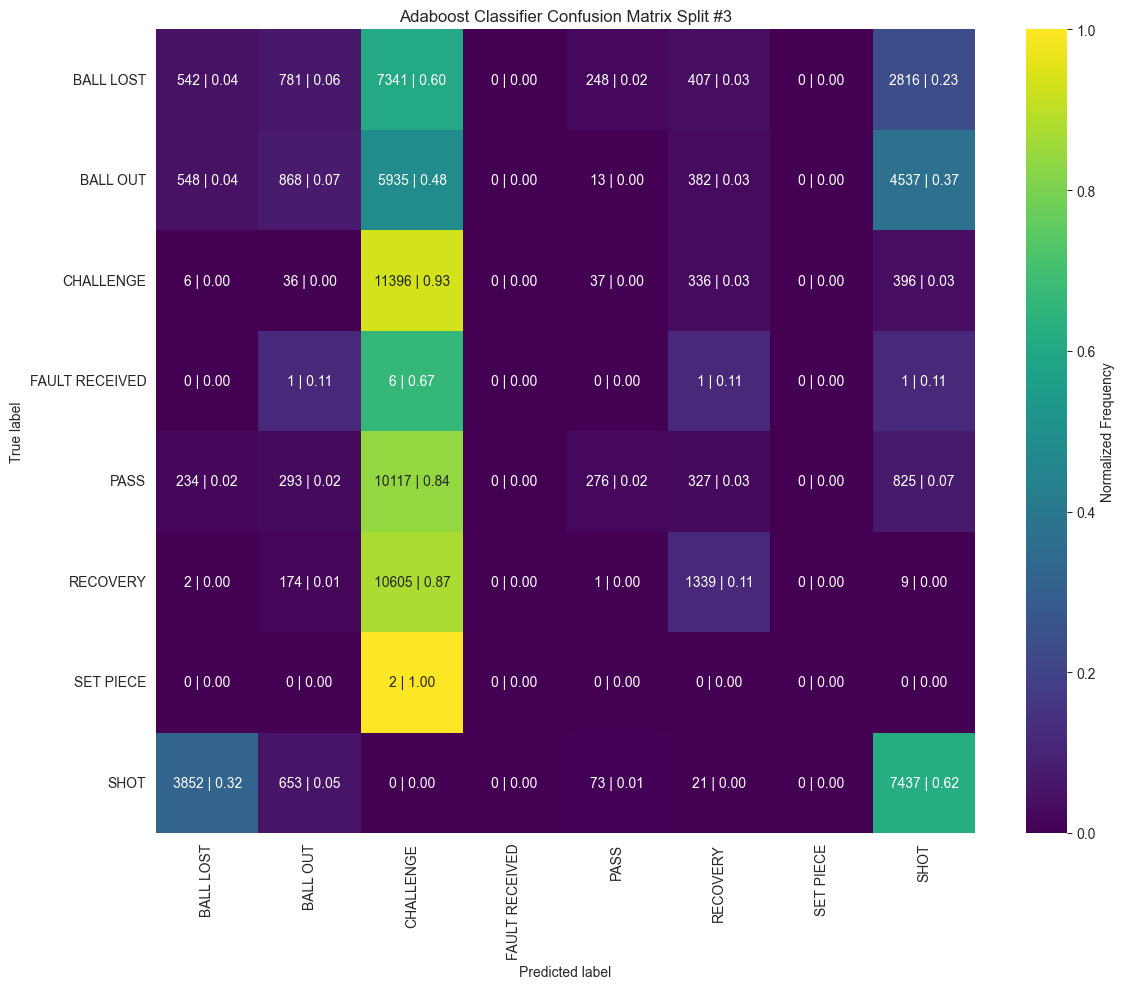

Split #3 AdaBoost classifier training accuracy: 30.00%
Split #3 AdaBoost classifier testing accuracy: 29.99%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


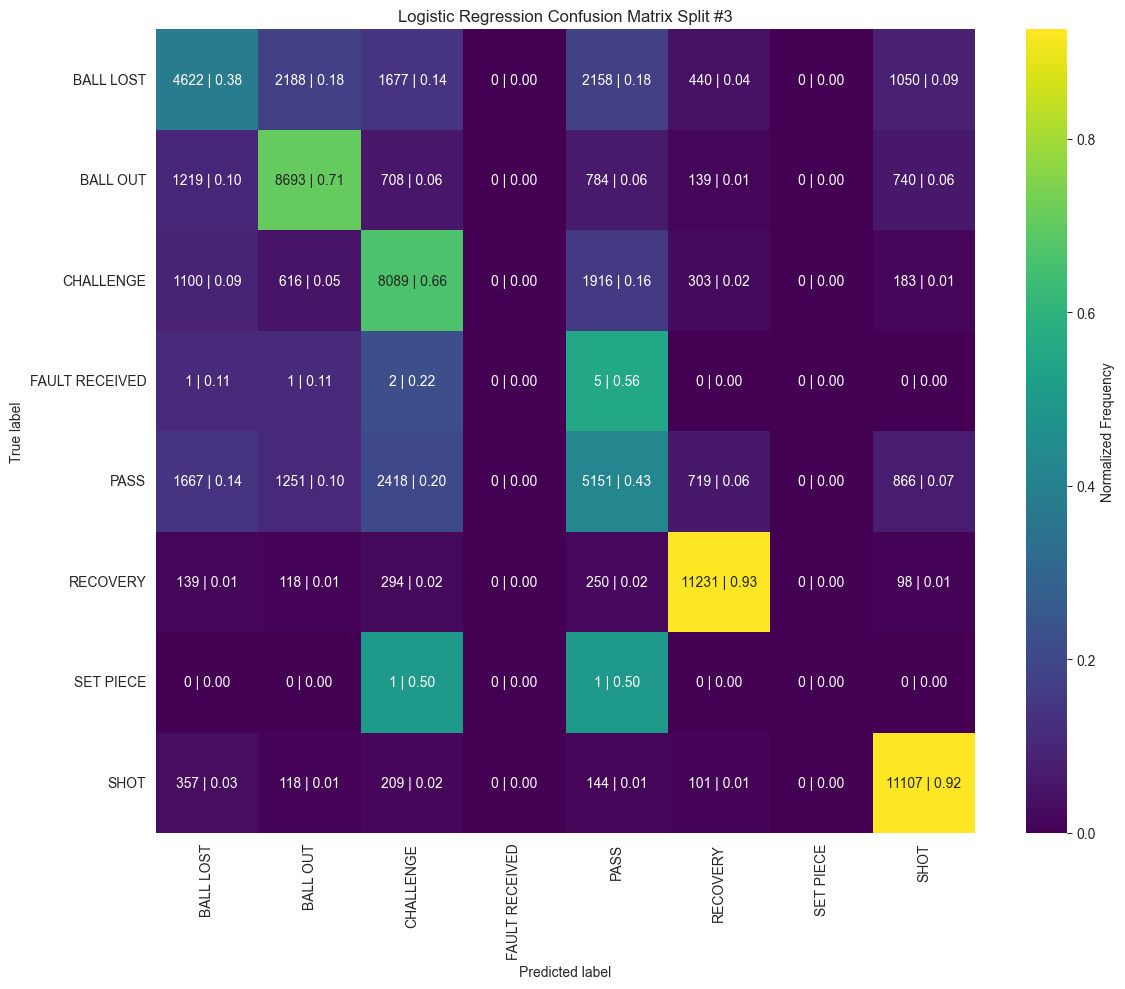

Split #3 Logistic regression training accuracy: 66.94%
Split #3 Logistic regression testing accuracy: 67.09%


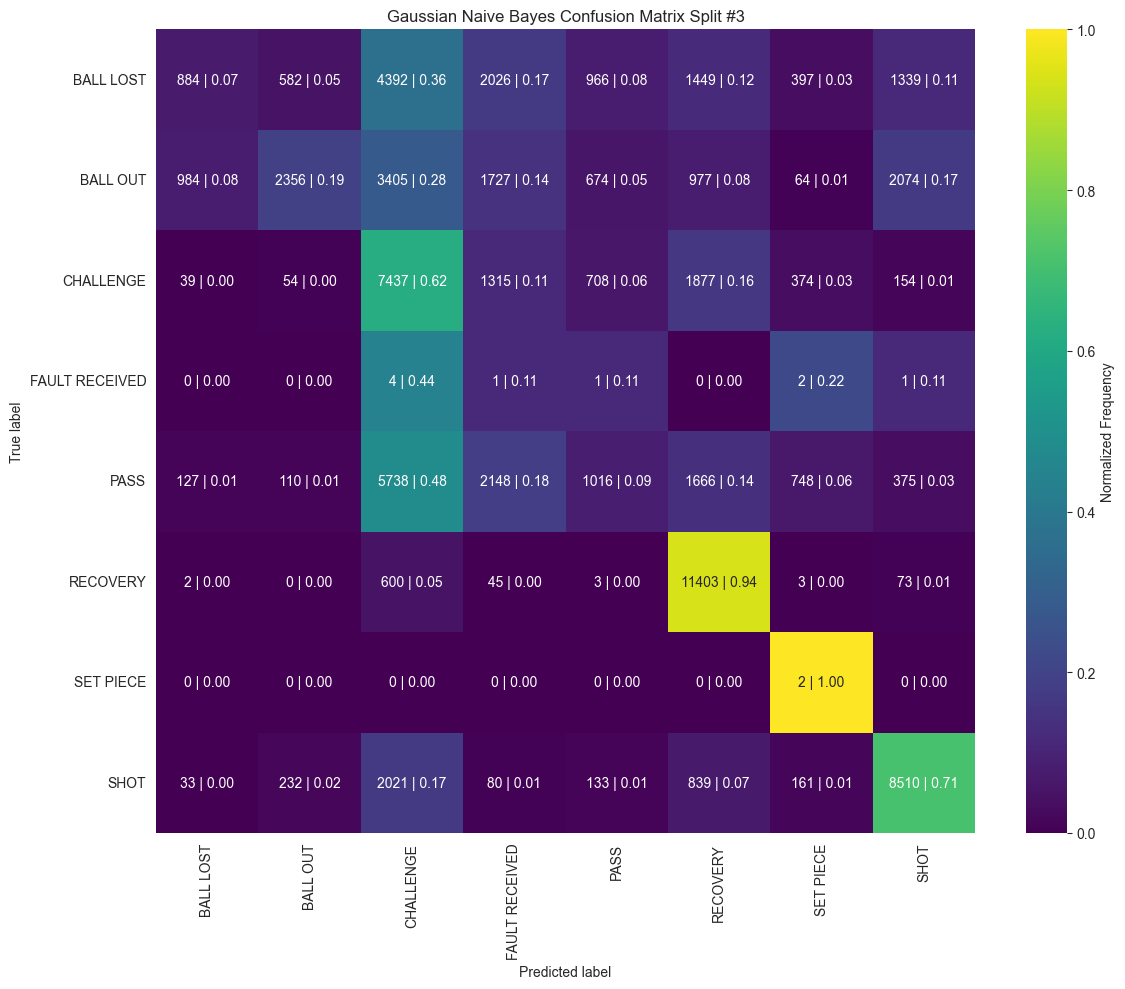

Split #3 Gaussian naive bayes training accuracy: 43.14%
Split #3 Gaussian naive bayes testing accuracy: 43.37%


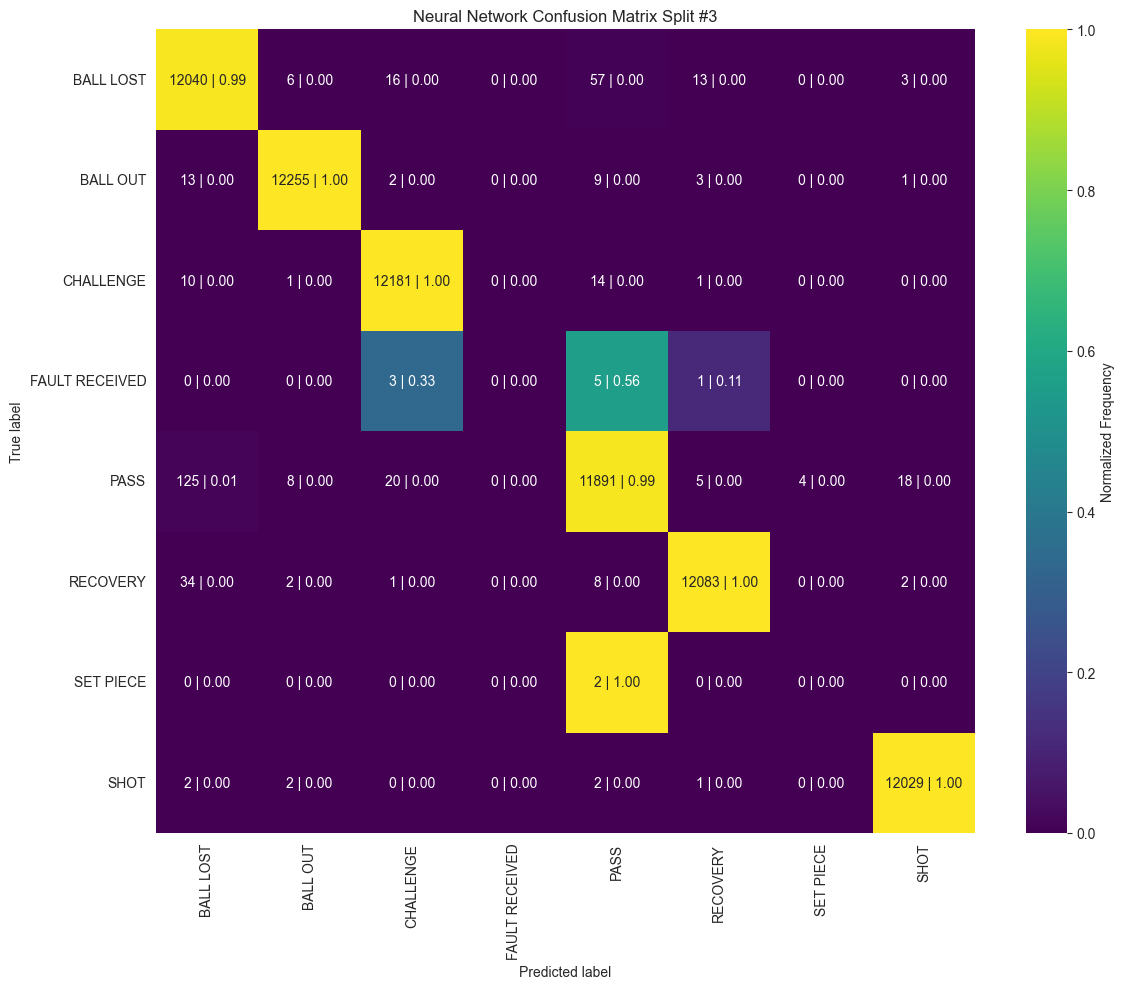

Split #3 Neural network training accuracy: 99.81%
Split #3 Neural network testing accuracy: 99.46%


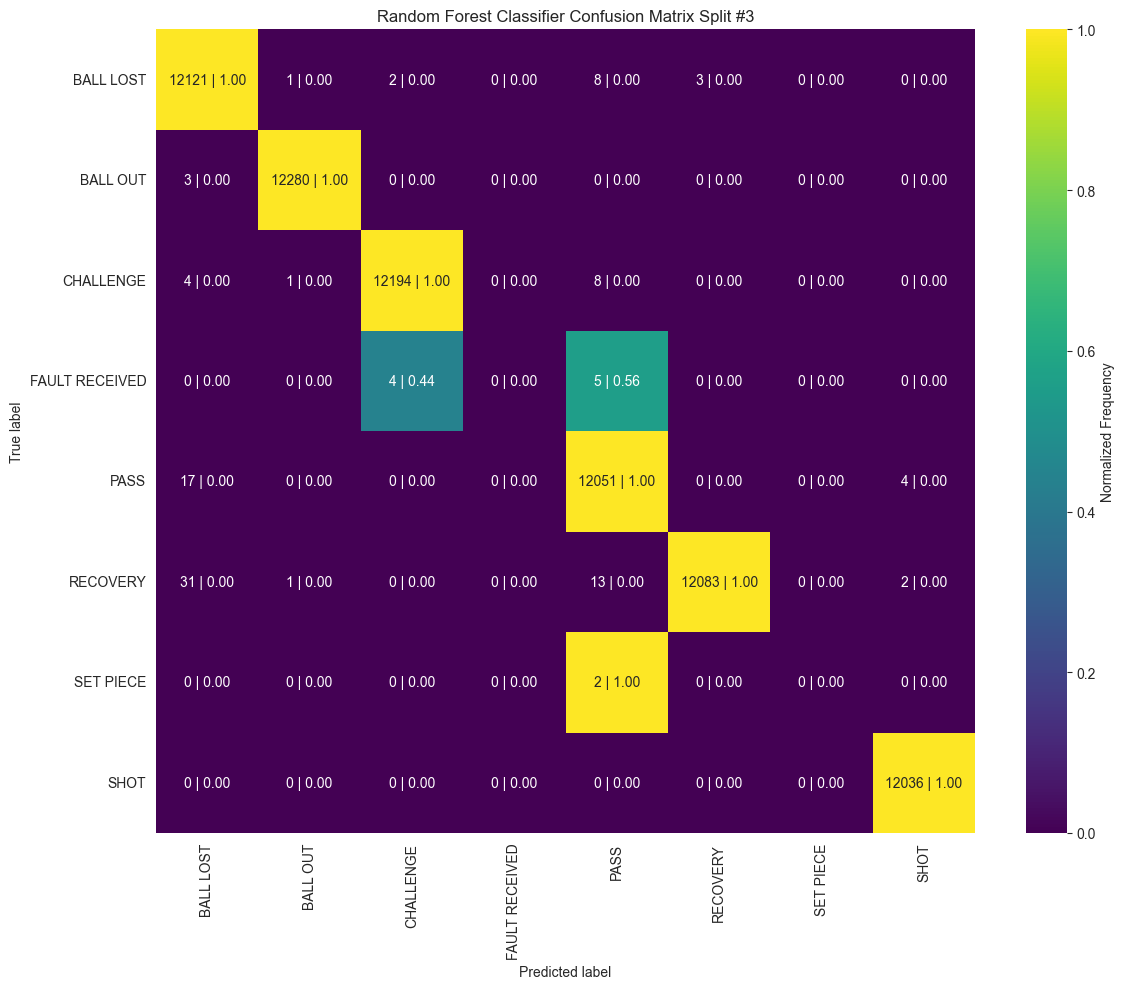

Split #3 Random forest classifier training accuracy: 100.00%
Split #3 Random forest classifier testing accuracy: 99.85%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


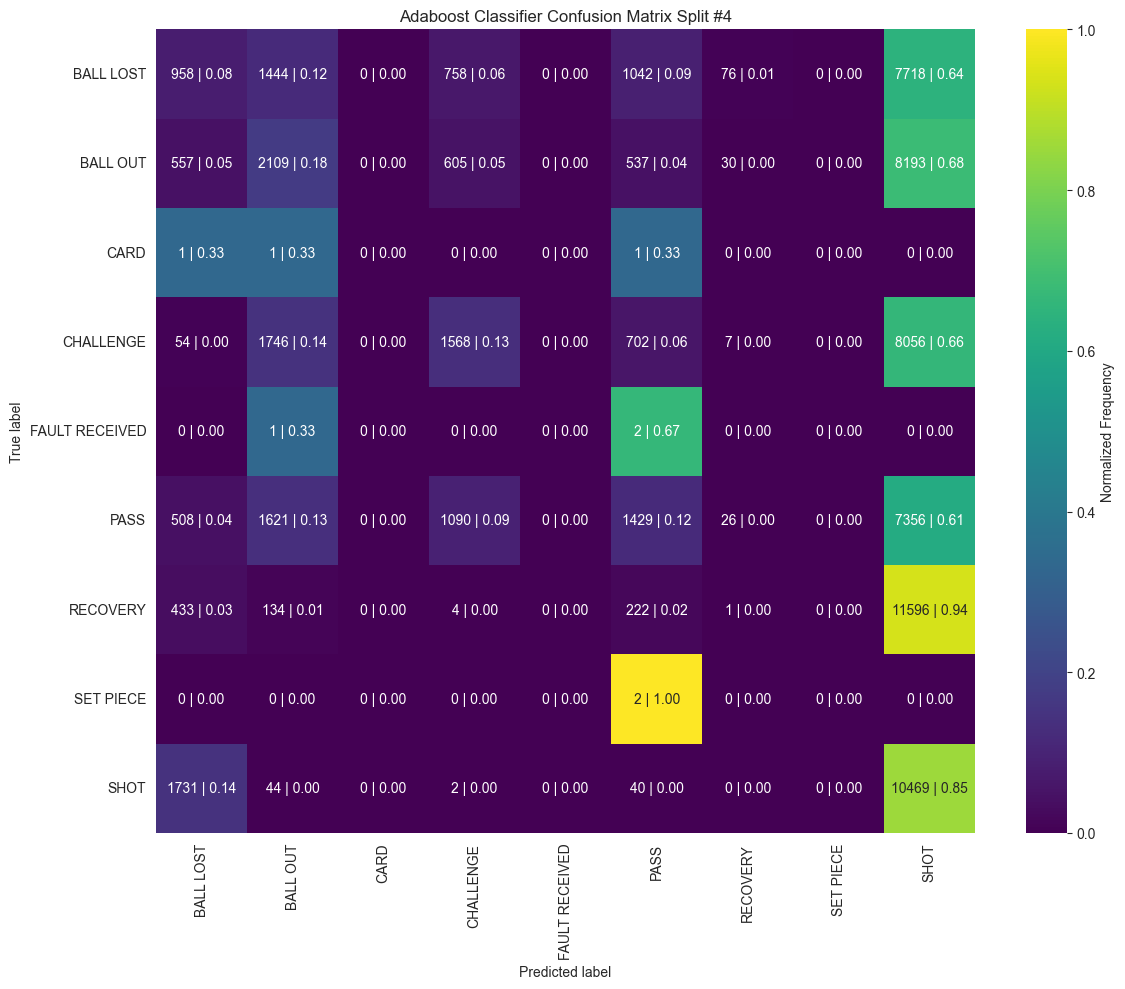

Split #4 AdaBoost classifier training accuracy: 22.76%
Split #4 AdaBoost classifier testing accuracy: 22.69%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


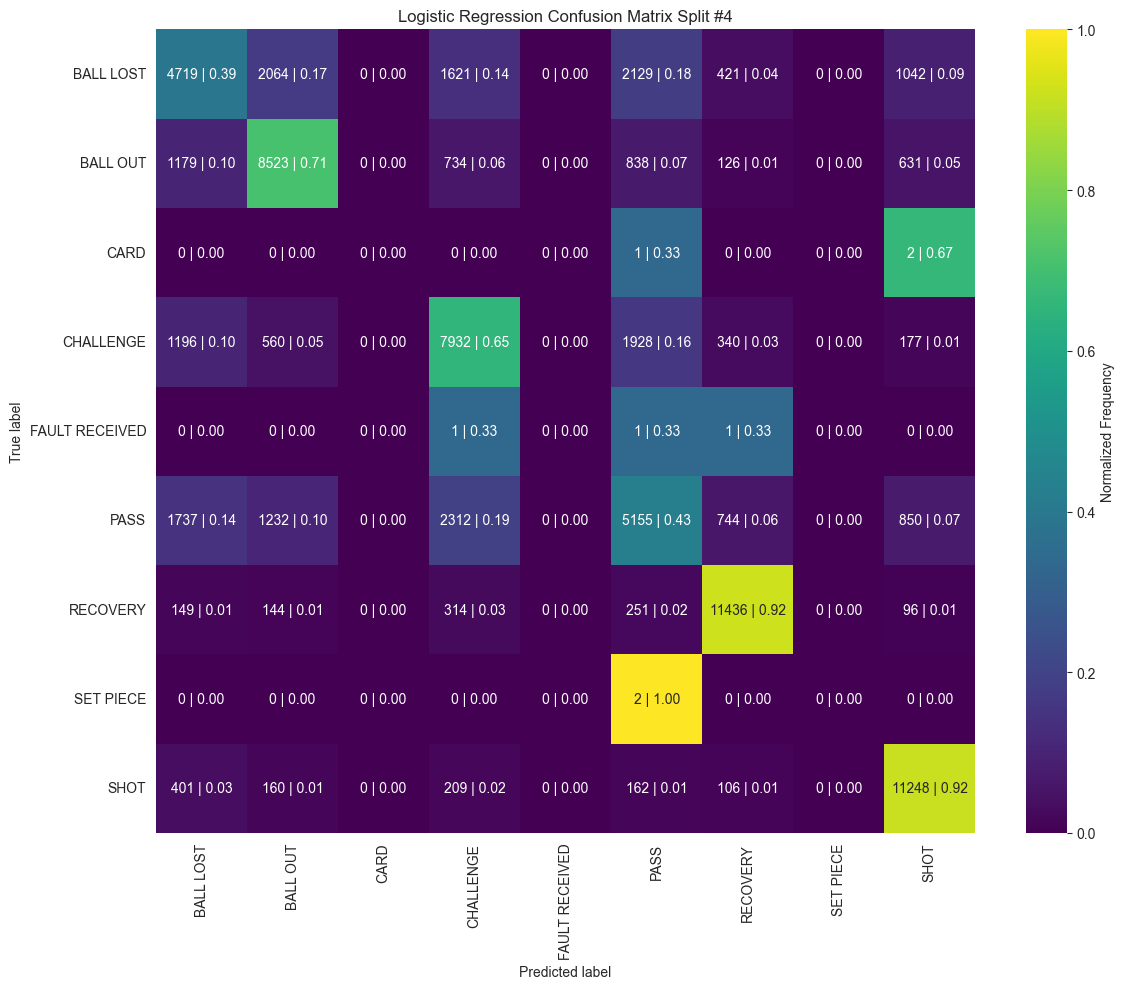

Split #4 Logistic regression training accuracy: 66.83%
Split #4 Logistic regression testing accuracy: 67.26%


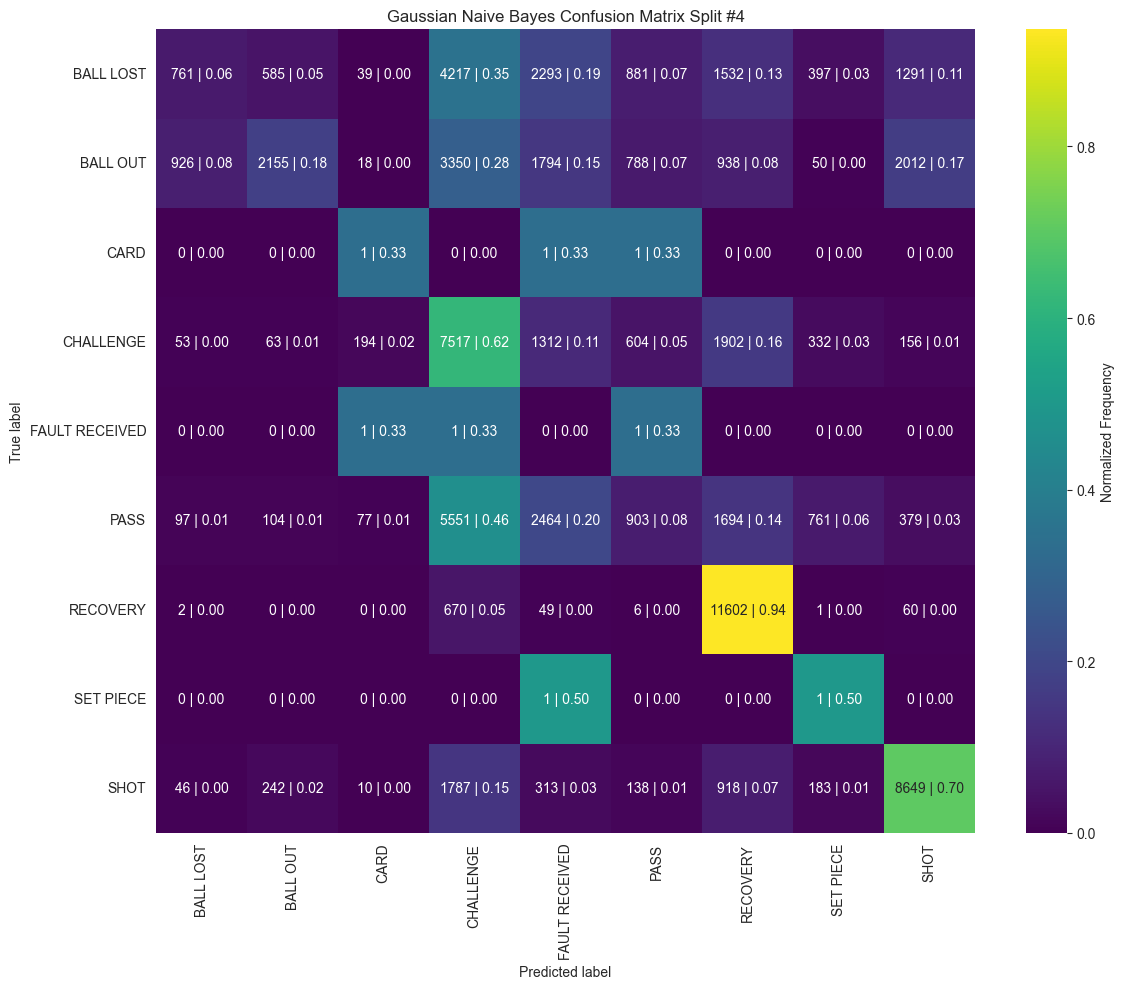

Split #4 Gaussian naive bayes training accuracy: 43.06%
Split #4 Gaussian naive bayes testing accuracy: 43.35%


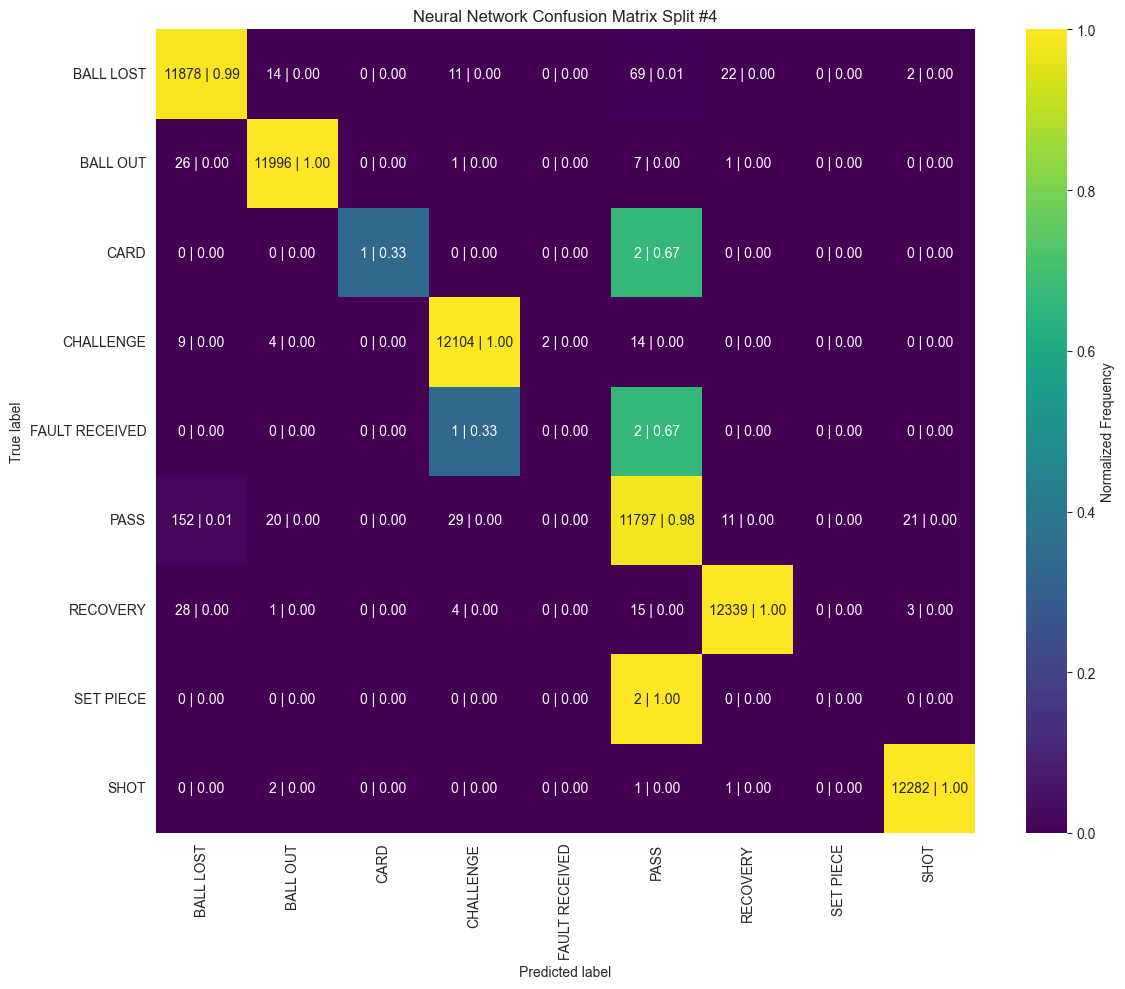

Split #4 Neural network training accuracy: 99.73%
Split #4 Neural network testing accuracy: 99.35%


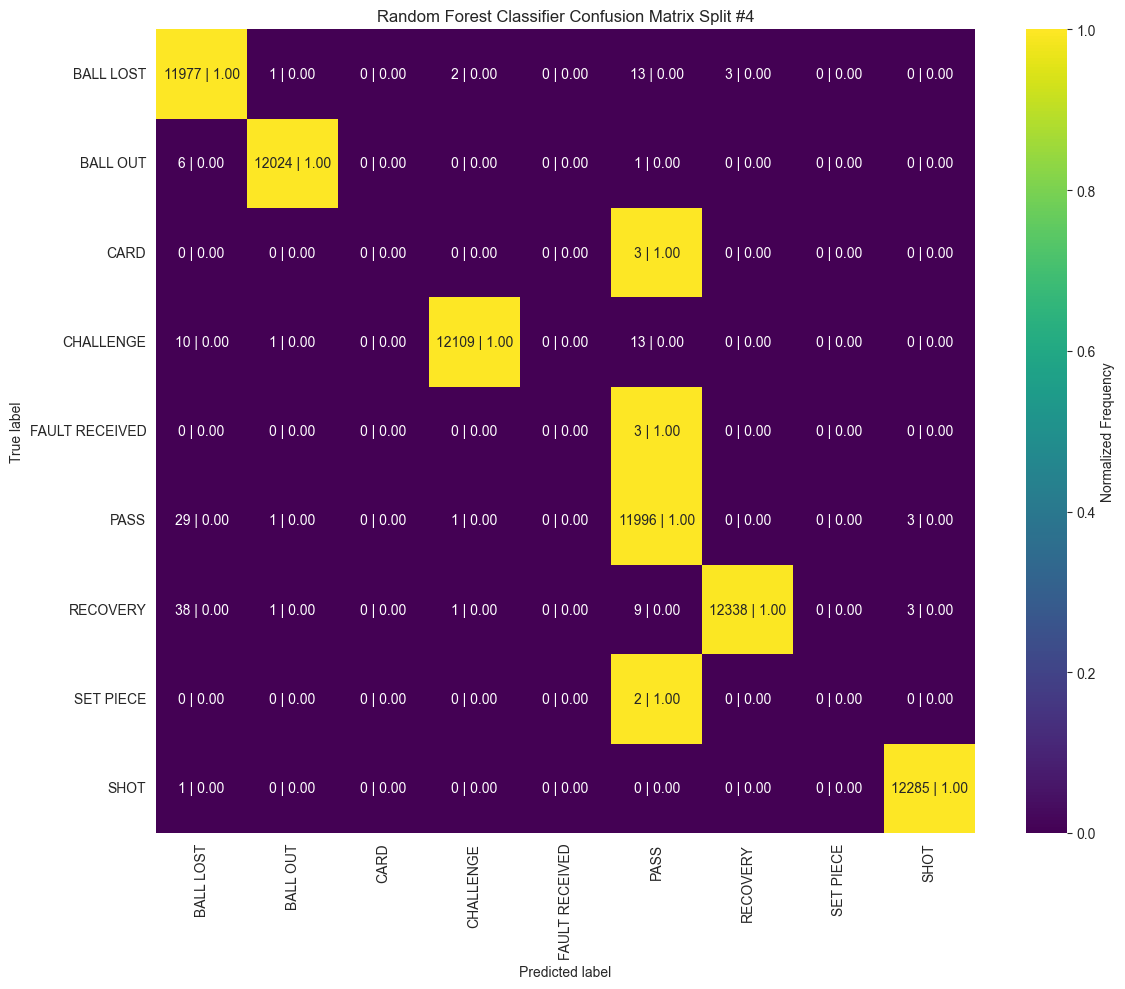

Split #4 Random forest classifier training accuracy: 100.00%
Split #4 Random forest classifier testing accuracy: 99.80%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


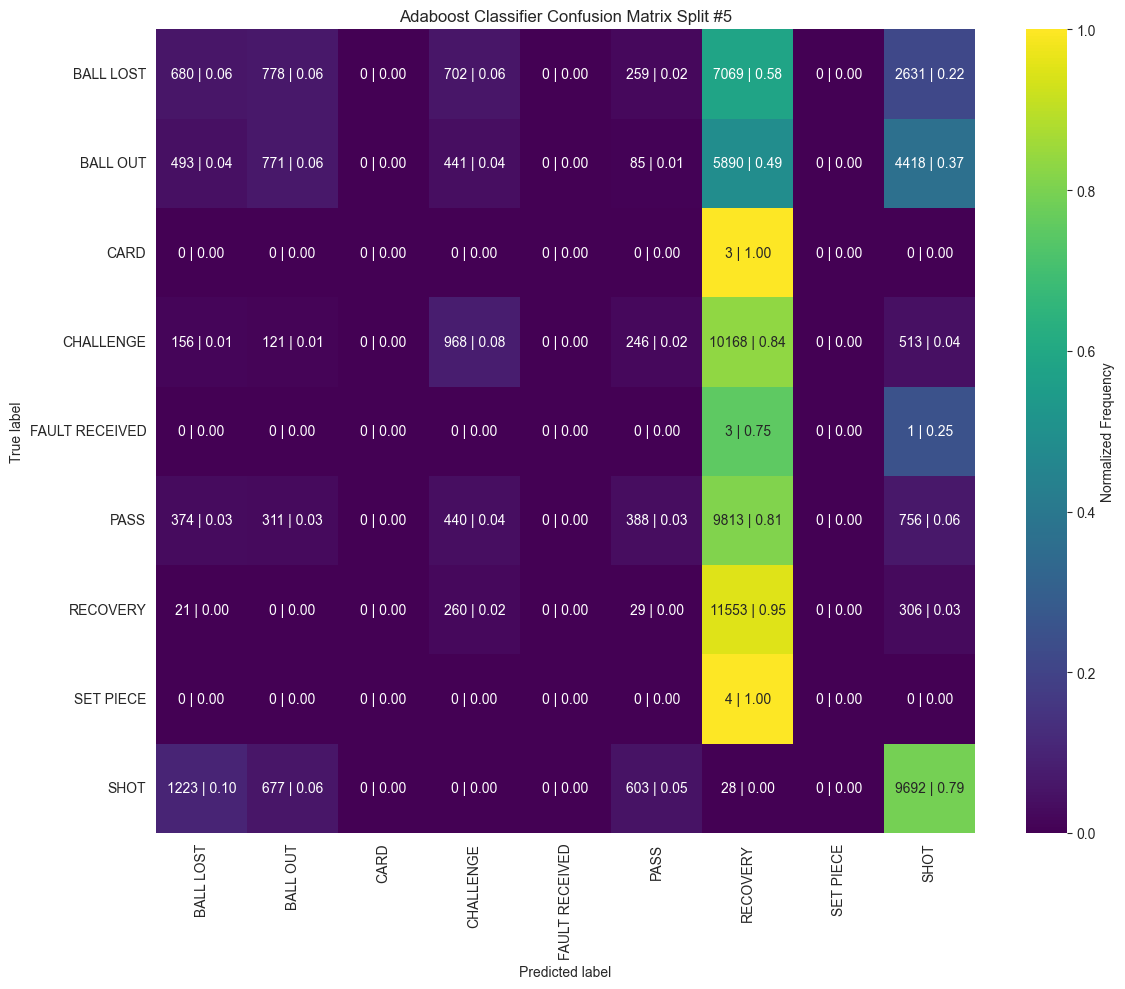

Split #5 AdaBoost classifier training accuracy: 32.76%
Split #5 AdaBoost classifier testing accuracy: 33.00%


H:\PAPER\flask-tika\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


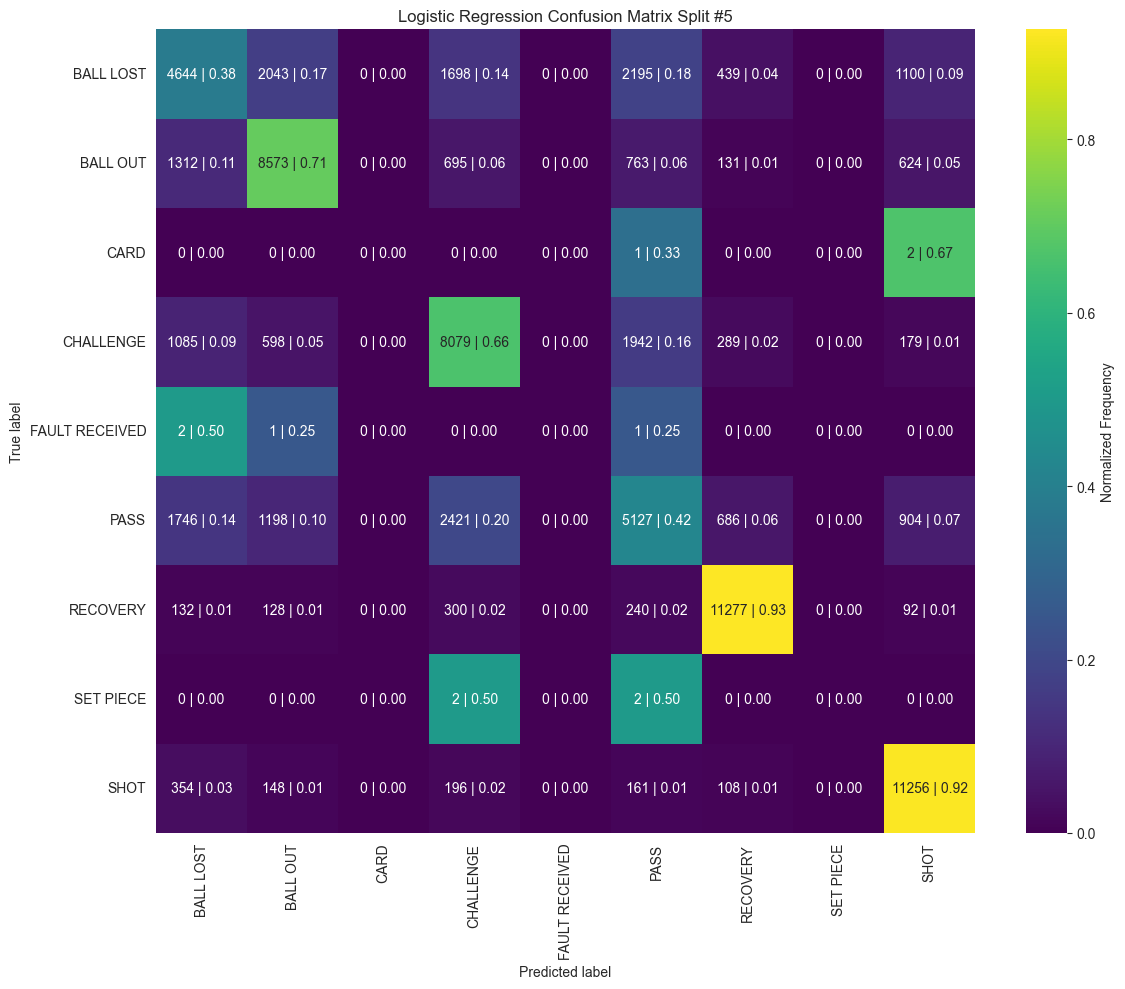

Split #5 Logistic regression training accuracy: 66.92%
Split #5 Logistic regression testing accuracy: 67.18%


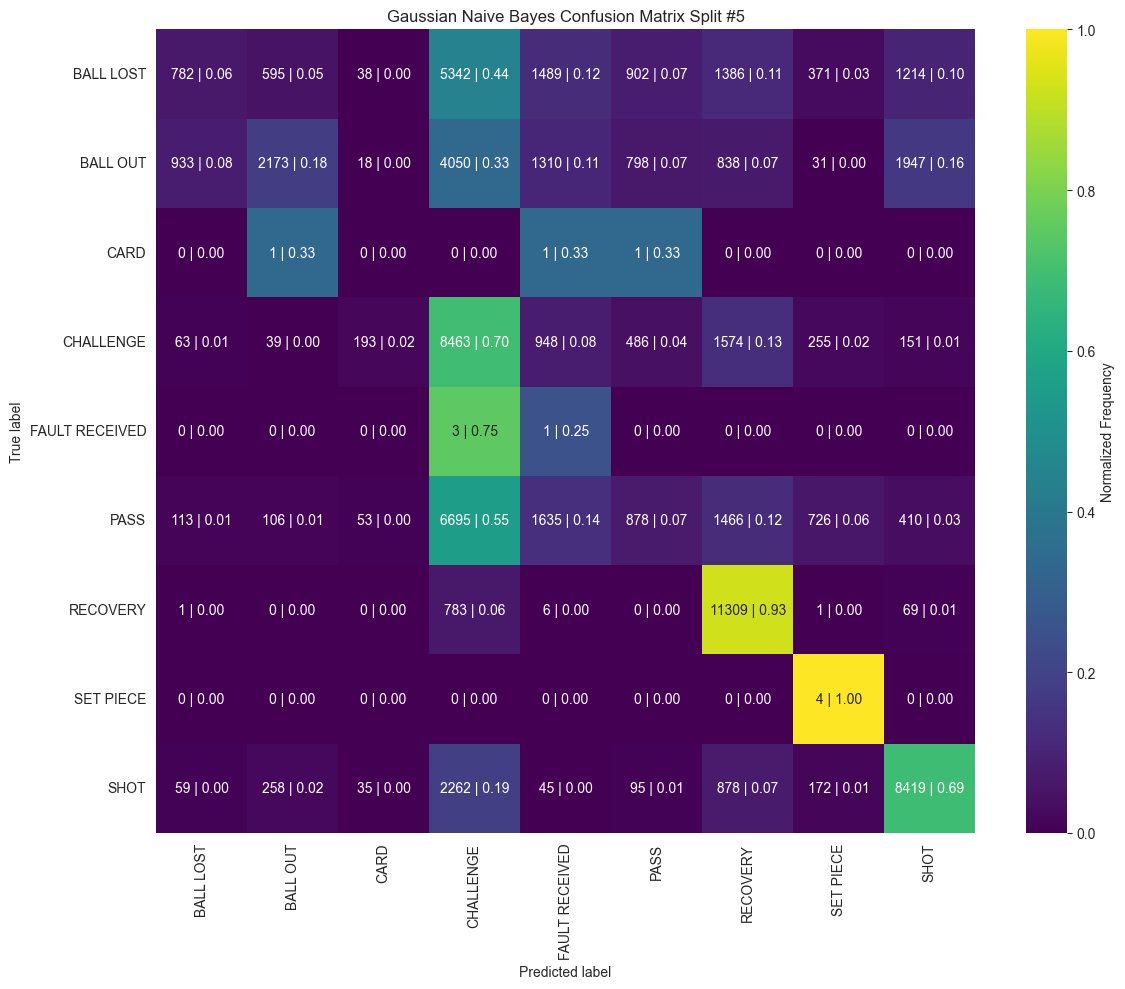

Split #5 Gaussian naive bayes training accuracy: 43.92%
Split #5 Gaussian naive bayes testing accuracy: 43.95%


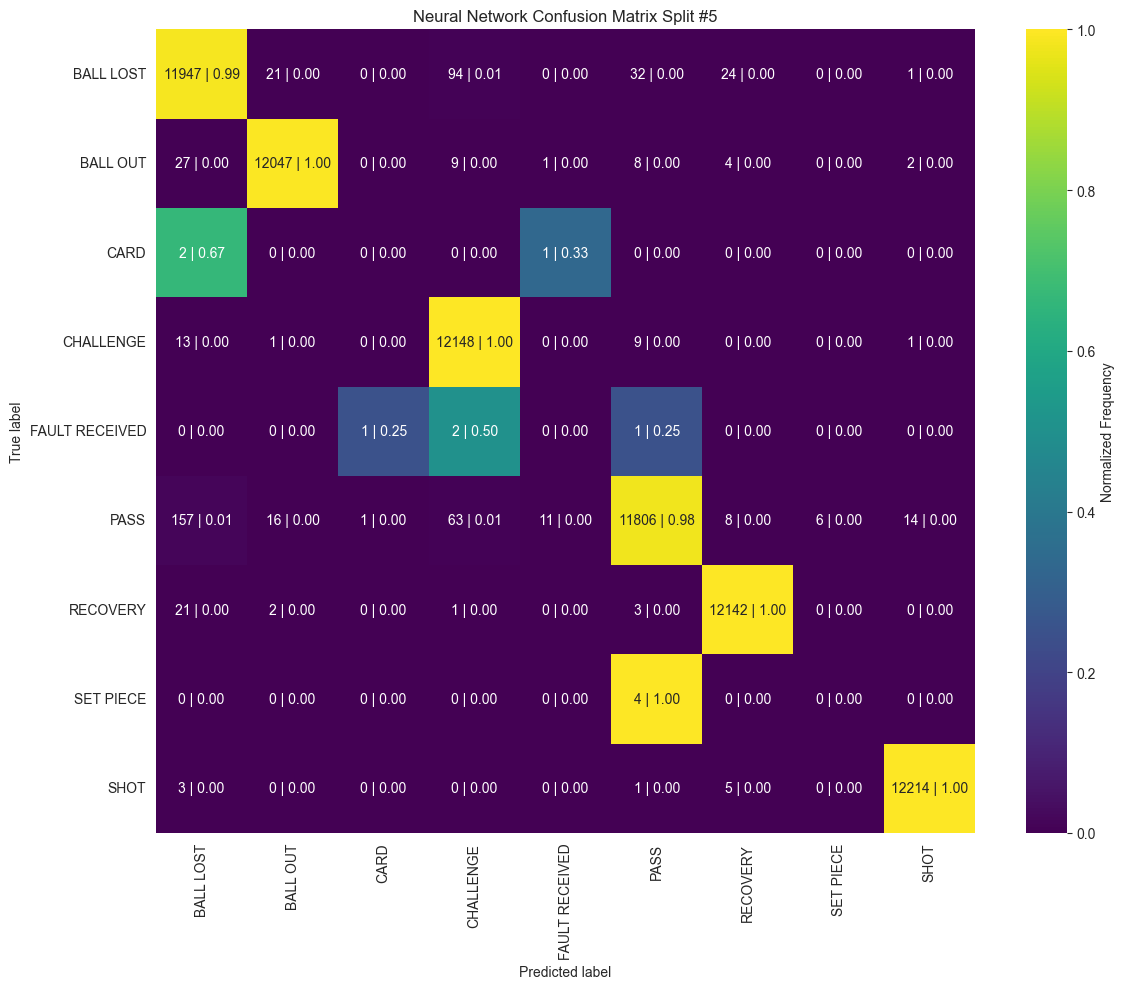

Split #5 Neural network training accuracy: 99.59%
Split #5 Neural network testing accuracy: 99.22%


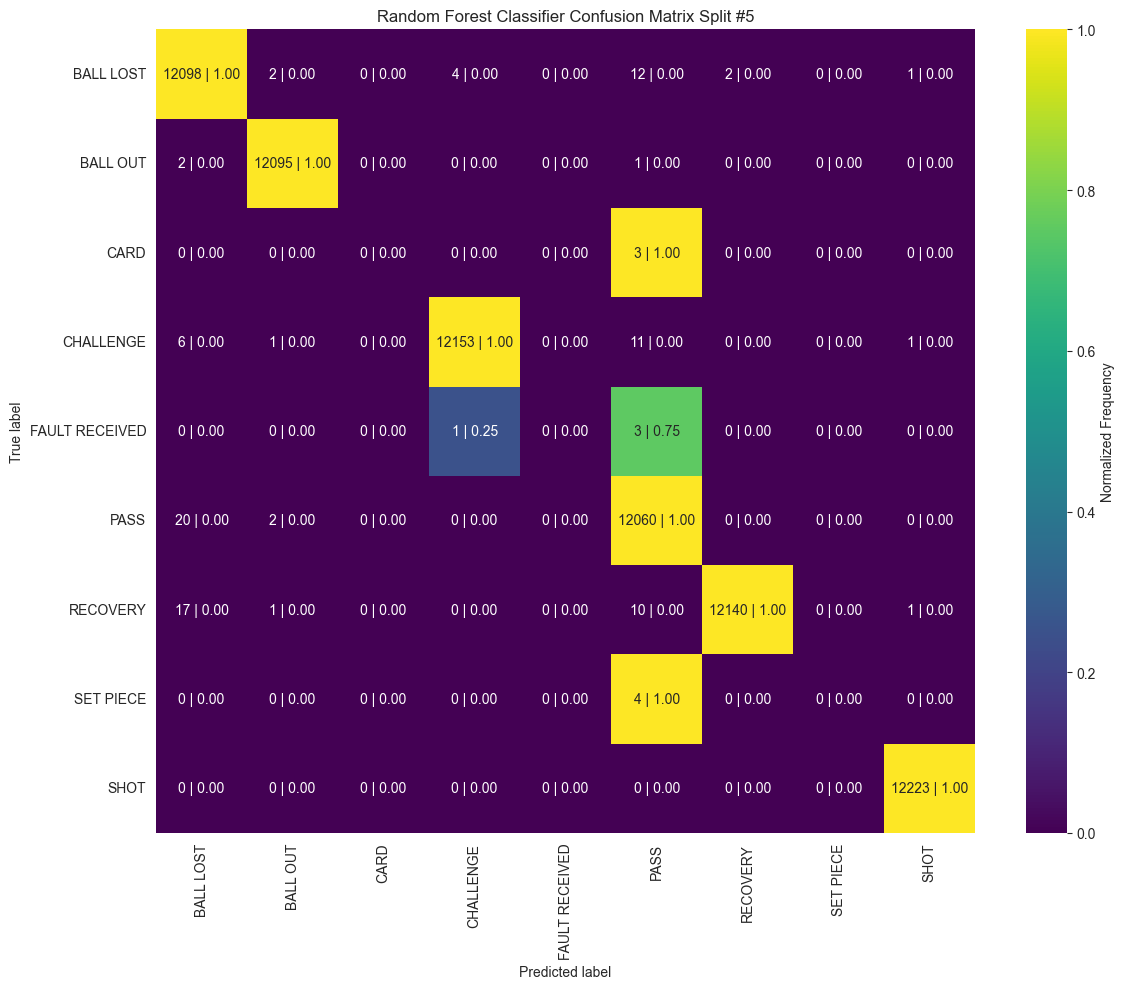

Split #5 Random forest classifier training accuracy: 100.00%
Split #5 Random forest classifier testing accuracy: 99.86%




In [81]:
for i in range(len(scaled["X_train"])):
    for name, model in models.items():
        X_train_scaled = scaled["X_train"][i]
        X_test_scaled = scaled["X_test"][i]
        y_train = scaled["y_train"][i]
        y_test = scaled["y_test"][i]
        
        model.fit(X_train_scaled, y_train)
        
        y_train_pred = model.predict(X_train_scaled)
        y_pred = model.predict(X_test_scaled)
        
        labels = np.unique(y_test)
        
        conf_matrix(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_pred=y_pred, labels=labels, split=i, model_name=name)
    
    print("\n")